# Problema de la mochila


Dado un conjunto de $m$ elementos cada uno descrito por su masa $w_j$ y su valor $v_j$ y una mochila cuyo límite de capacidad es $C$. Asumiendo que el volumen y la forma de los objetos no importan, encuentre el subconjunto de objetos de mayor valor que puede ser llevado en la mochila. Este es un problema de optimización combinatorial NP completo

Podemos definir la variable indicadora

$$
x = (z_1, z_2, \ldots, z_m)
$$

donde cada $z_i \in \{0, 1\}$ es igual a 1 si el elemento $i$ está en la mochila y 0 si no lo está

Se define entonces un espacio de posibilidades

$$
\Omega = \left \{x \in {0, 1}^m : \sum_{j=1}^m w_j z_j \leq C \right \}
$$

De donde queremos encontrar aquella que maximiza la utilidad

$$
U(x) = \sum_{j=1}^m v_j z_j
$$

## Solución con Monte Carlo

Para resolverlo con Monte Carlo podríamos

- Dado $x_t$
- Escoger $j \in [1, ..., m]$ al azar de manera uniforme
- Crear $y=(z_1, z_2, ..., 1-z_j,..., z_m)$, si es la mejor solución hasta ahora, guardarla
- Si $y$ es factible entonces $x_{t+1} = y$ de lo contrario $x_{t+1} = x_t$

Pero esto podría tardar muchisimo para $m$ grande

## Actividad: Simulated Annealing

Resuelva este problema usando el algoritmo de Simulated Annealing, el cual es una versión del algoritmo de Metropolis donde la distribución de interés se formula a partir de la función de utilidad como

$$
p(x) = \frac{1}{Z} \exp \left(\frac{U(x)}{T} \right) 
$$

donde $T$ es la temperatura y $Z = \sum_{x\in \Omega}  \exp \left(\frac{U(x)}{T} \right)$ es la evidencia que no depende de $x$

- Implemente la solución de Monte Carlo con el criterio de aceptación ingenuo 
- Implemente la solución de Simulated annealing modificando el criterio de aceptación ingenuo por de Metropolis
- Para el conjunto de datos $X_3$
    - Muestre las trazas y compare SA con el método de montecarlo clásico ¿Cuánto demora cada uno en llegar a la solución óptima?
    - Explore la influencia del parámetro $T$. Muestre y compare resultados con un $T$ grande, adecuado y pequeño decididos por usted. Pruebe con un valor de $T$ adaptivo dado por
    $$
    T_i = \frac{\alpha}{\log(i)}
    $$
    donde $\alpha$ es una constante positiva seleccionada por usted (seleccione un conjunto de va
    - Muestre la mejor solución obtenida usando Montecarlo y SA (Mejor valor de $T$)

Nota: La solución óptima tiene un valor de 1458. Su resultado no necesariamente alcanzará esta solución pero acercarse.

In [1]:
X3 = {"m": 15, "C": 750,
      "v": [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240],
      "w": [70, 73, 77, 149, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118]
     }

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from random import randint
import math

**Solución monte carlo con criterio de aceptación ingenuo**

In [83]:
def vector_random():
    x= np.zeros(15)
    for i in range(np.random.randint(15)):
        x[np.random.randint(15)] = 1
    return x

def monte_carlo(X):
    pesos = 0
    valor = 0
    peso_maximo = 0
    valor_maximo = 0
    mejor_vector = np.zeros(len(X["v"]))
    resultados = []
    for i in range(10000):
        y = vector_random()
        pesos = 0
        valor = 0
        for j in range(len(X["v"])):
            valor += X["v"][j]*y[j]
            pesos += X["w"][j]*y[j]
        #print(valor)
        if(pesos < X3["C"] and valor_maximo < valor):
            peso_maximo = pesos
            valor_maximo = valor
            resultados.append(valor)
        
    print("peso máximo: ", peso_maximo)
    print("valor_máximo: ", valor_maximo)
    plt.plot(resultados)
    return;

peso máximo:  745.0
valor_máximo:  1492.0


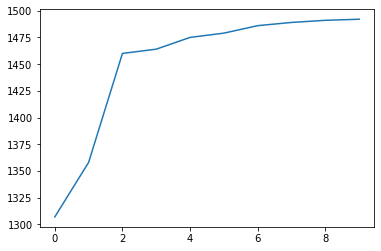

In [84]:
monte_carlo(X3)

In [43]:
T=100

In [99]:
def p(valor, valor2, T) : 
    return (np.exp(valor/T)/np.exp(valor2/T))

In [96]:
np.exp(948/T)/np.exp(900/T)

1.616074402192894

In [116]:
%%time
mix_time = 100000
us = scipy.stats.uniform.rvs(size=mix_time)
valor = 0
pesos = 0
valor2 = 0
a = 500
x = np.zeros(15)
y = np.zeros(15)
resultados2 = []
for n in range(1, mix_time):
    valor = 0
    pesos = 0
    valor2 = 0
    T = 10
    #j = randint(0,len(X1["v"])-1)
    x = vector_random()
    for j in range(len(X3["v"])):
            valor += X3["v"][j]*x[j]
            valor2 += X3["v"][j]*y[j]
            pesos += X3["w"][j]*x[j]
    cociente = p(valor,valor2, T)
    #print(" valor : ", valor)
    #print(" peso para valor:", pesos)
    #print(" ------ ")
    #print(" valor2 : ", valor2)
    #print("\n")
    print(cociente)
    #print(x)
    if (pesos<X3["C"] and us[n] < min(1,cociente)):
        resultados2.append(valor)
        y = x.copy()
    else:
        x = vector_random()

3.928117318587324e+51
3.072363730643431e+30
17619017951355.883
3.827378540512215e-55
2.2720459927738073e-08
1.26314697824642e-13
1.8828518748858514e+26
9.982350930569105e-39
8.606523710245272e-59
8.614685180288909e+18
0.0060967465655154965
0.009095277101695661
6.5544085401917e-31
9.528496620133568e-21
0.14956861922263417
9897.129058743803
4.9530324243950865
3.374776786257195e-45
2403038944.052669
1446257064291.475
0.00020346836901064414
1.5588472111807196e-17
1.053924153231238e-59
44355.85513029736
4.7111658015535456e-58
2.877356658764393e-22
3.1882020552598606e-23
60.340287597361616
11.02317638064135
7.635340860610365e+26
1.5269401591265922e-09
2.6994912998209376e-36
8.606523710245272e-59
1.2795797118463785e-18
5.162192993279661e-16
2.7917525610534132e-49
7163358133446.125
10938.019208164997
3.726653172078671e-06
2.221613055855651e-38
1.323312261779144e-31
2.5109991557439816e-08
8.577279313511418e-19
0.00020346836901064414
5.705105569666608e-16
3.066941294563522e-08
1.2351087201852315

9.50389638092987e-20
1.1175725853661256e-43
17894429.11955492
2.4616174324780677e-39
7.781132241133797e-20
2.0154018942826505e-39
2.5655685594720065e-55
1.7482906026921356e+16
6.685894442279307
2.3618781737514457e-23
40134.83743087557
1.2995814250075031e-24
1.68752985750855e-09
0.9048374180359647
1.963969532498214e-29
2.301603856719316e-13
1.68752985750855e-09
2.1243552107720443e+18
1.123365606080577e-45
3.0828390131387016e-10
2.734609953587577e-41
147266.6252405535
4.079558667177589e-41
1.1003721500112725e-37
1.5281906649926324e-48
5.621899278409044e-49
132222940.62272951
1.8892714941156517e-14
1.6918979226151304e-10
1.2511766939961563e-48
1.654342617187944e-40
665.1416330443618
2.9096448952483842e-65
54.598150033144236
1.7587922024243118e-25
3.4186804719272264e-50
2.9096448952483842e-65
2.699491299820976e-36
2.2897348456455527e-11
2.9096448952483842e-65
492.7490410932646
5.573903692694566e-07
6.085986375172022e-41
8.386888191182236e-49
4.1937956583795446e-13
8.733903601468489e-26
1.1

296558.5652982012
6.208075409403513e-10
1.323312261779144e-31
7.902762784127537e-26
0.04076220397836552
2.718281828459045
5.839395754845974e-25
2.603539969884927e-22
179871.86225375006
2.3436319931528806e-20
8.36523530469812e-48
4.8181141862214625e-28
1.243706023602863e-07
2.0718377657208707e-11
540364.9372466857
90.0171313005218
5.7542309041673644e-58
1.403229540863071e-15
0.6065306597126334
7.661373700298205e-14
1.072291031958601e-27
2.5701045548452272e-17
2440.6019776244575
961965785544776.4
6634.244006277771
4412711.892350366
16317.607198015245
4.793267925009322e-26
1610805175.6028104
2.27979257674081e-48
7.510703862341695e-45
1.066761394833838e-25
1318815734.4832146
1.0503429888607878e-19
266264304.66871896
2.0137527074704535
1.8617173547076036e-47
7.727344003768923e-56
177103474428.77826
1.441156550964089e-64
4.262839099817069e-58
1.0503429888608029e-19
32605775.720996216
4.37089457688698e-29
1.0182603693120059e-07
0.004991593906910159
78962960182680.7
2.301603856719315e-13
1.933

0.00015073307509547488
3.6692966676192857
1.2740236425030916e-55
6.962529631652289e+23
9.025013499434019
4.240856305369781e-56
2.685570445440426e-34
49020.80113638227
793722705666.3527
1.3887943864964021e-11
7.058883911899134e-21
2.2975417400923666e-51
4.830585572350026e-29
1635.9844299959357
1.903980283286452e-17
0.2465969639416051
60.340287597361616
1.4437045551572357e-26
54.59815003314424
3.21565492015576e-65
5.646416611674931e-12
0.00018410579366758017
1.9154170769191918e-58
3.20472833801755e-25
5.602796437537267e-09
1.5955402886531074e-26
1.381632591079531e-09
6.181119294717052e-47
5.202382880563678e-19
1.767909032771162e-27
1.6373242389689075e-36
6.45353036739022e-25
1.6831730696737477e-08
3.755666765938275e-09
216314672147.05643
145000060991.79825
1.0484892312271558e-57
1.1698459177061964e-22
4.3371281732200416e-26
2.96035167027278e-33
60.340287597361616
7.862009472594782e-24
3.21565492015576e-65
1.5335992077691734e+28
3.54177255950993e-25
3.21565492015576e-65
4.1292494158733153

2.3741211451384807e-25
0.009095277101695921
2.0558322297604703e-08
5.754230904167487e-58
161497464.36864832
53342541407.48932
1.8746763345243014e-11
8.343638320651879e-47
3.2632478610144474e-32
0.00020346836901064417
9.055784454379121e-40
2.2505148195758224e-43
8.358390101374668e-09
5.162192993279809e-16
1.5242452518381218e-47
3.427529511731537e-51
9.406128904299242e-16
3.149835724926375e-57
4023.8723938223557
65659969.13733052
3.059023205018258e-07
5.87447172951576e-66
5.87447172951576e-66
4.793267925009459e-26
87946982651.73
1.68752985750855e-09
14764.78156557761
5.082742255106042e-10
2614894114445696.5
4.284935843716333e-60
5.3110922496791705e-27
1.5203100247718506e-46
2.664823649986677e-31
5.754230904167487e-58
4.439218088720547e-35
1.4738723100079323e-34
6.685894442279308
7.602187409607487e-11
2.6717213787284643e-32
5.87447172951576e-66
7.902762784127761e-26
6.82560337633487e-08
179871.8622537552
1.3439975790264084e-37
8.801900788274205e-29
22026.465794806718
1.3029453099488805e-2

5.04347662567888e-07
1.1587598062677433e-57
1.82361104632748e-39
6.34900520574265e+20
1.013009359863071e-05
80821.63754031448
7.1322540809577815e-25
5.573903692694566e-07
1.1829733350271e-65
162754.79141900392
9.309367170903004e-12
1.1379798735078682e-50
8.194012623990515e-40
0.00027465356997214546
1.287265867648271e-59
6.213159586848109e-49
0.006737946999085467
0.011108996538242306
1.1118094383533502e-41
3.409854278171391e-49
1.1829733350271e-65
4.6266808996374464e-51
268337.2865208744
1.403229540863091e-15
2.3802664086944007e-26
6.878743627134561e-11
7.8823597906008515e-25
1.309699223984654e-27
2.327431287389655e-56
2.5767571091549807e-18
5.6318389500743115e-11
4.563526367904018e-07
14537538454.77396
3.0694530027380014e-47
1.1829733350271e-65
8.555134883887181e-18
1.1829733350271e-65
1.1409254629772163e-51
4.496969474347335e-40
9.57005078458768e+16
2.0718377657209005e-11
1.5428112031918877e-13
3.857176324581213e-58
3.857176324581213e-58
5.408074755608367e-34
5.839395754846057e-25
3.8

2.1649182562933857e-28
1.1829733350271e-65
0.036883167401239585
4.292511727467311e-22
2.1426475384166538e-24
3.86716038337486e-59
712641781603964.1
1.306317902095234e-26
8.893387906766636e-33
1.1587598062677433e-57
1.842565693044453e-43
7.701087001365469e-16
2.96035167027278e-33
20.085536923187668
240925905.951592
2.289734845645553e-11
9.930873508252971e-37
9.50389638092987e-20
5.118122037182254e+26
6.968231678385761e-16
5.13977820976242e-53
2.301603856719315e-13
3.717031868412713e-05
1.2098280653880192e-35
5.2700625516024115e-24
3.86716038337486e-59
13.463738035001613
9.80333835177528e-32
7.701087001365469e-16
2.0154018942826365e-39
2.847757019982746e-18
264207337190.9321
400312.19132988475
1.0341772767478804e-13
11.023176380641663
3.2296785231129646e-28
9.009085190447647e-38
1.7497223861455117e-23
1.0288441862970255e-11
4.0064003177634615e-34
6532137094.697784
3900963621646911.0
2.8039275084414883e-12
1.6629180253320303e-42
2.7917525610534535e-49
2.4426007377405274e-36
6.049647464413

3.188202055259951e-23
1.6586247792062067e-41
4.048042916267684e-38
0.4065696597406084
2.632755574418073e-65
0.4493289641172293
1.0503429888608179e-19
0.1353352832366127
3.085363740939512e-49
4.683035828352875e-17
3.366063941040339e-44
6.245365962219344e-51
1.2004817995138993e-32
2.5788673751408945e-57
8.336810789962921e-08
2.632755574418073e-65
2935078394.2322826
3.532628572200857e-24
8.408597124803763e-50
5.202382880563678e-19
5.749522264293642e-19
4.2779260573211704e+18
2.632755574418073e-65
2174359553.5764885
221.40641620418836
44.701184493301334
1.6487212707001282
1.5361121550988391e-50
2174359553.5764885
14650719.42895352
2.2661801277657501e-07
5.779325341079294e-21
11.023176380641663
1.1003721500112805e-37
0.0003035391380788684
2.632755574418073e-65
2.632755574418073e-65
1.2785326422808632e+21
0.014995576820477878
2.0681811648632688e-49
4.255865461793904e+20
2.632755574418073e-65
1.3029453099488805e-25
3557218374864.0493
26903.18607429802
0.12245642825298261
5.661032006637694e-13

1.5388280433968291e-12
0.001007785429048505
7.821466319514996e-22
3269017.3724721107
1.1548224173015786e-17
29502925.916445963
298.86740096706535
4.893428398410156e-34
4.496969474347367e-40
33.11545195869231
5306746226525.561
1.1370486739266858e-11
19930.370438230402
26489122129.843475
5.008612841144819e-43
1.894161754784896e-15
3.775134544279098e-11
8.606523710245426e-59
0.0016615572731739248
3.758742514056881e-48
3.532628572200807e-24
1457516796.0514157
8.33681078996292e-08
6.920062737425152e-52
48266327438.6278
3.1068402375434566e-13
6.321437159096094e-17
9.487122888220932e-58
2.2779270412053546e-09
1.7497223861455364e-23
5389698.476283012
9.357622968840174e-14
1.1311850917716405e-09
1.8001917046195943e-34
1.515144112143241e-06
3.0536243137247145e-45
4.175585757680207e-50
6.181119294717095e-47
9.365286505845624e-53
1.5281906649926324e-48
1.8142069694096174e-37
7.3569720421993005e-37
1937161205134790.2
8.659340042399374e+16
1.145901085702239e-14
1.3063179020952341e-26
2.0718377657209

5.0869048275338925e-49
8.718489074362108e-64
3.914264031208759e-25
1318815734.4832146
5.193201158897262e-57
26695351.310743306
8.718489074362108e-64
1.900619935265022e-55
0.0006755387751938558
1.9538416488219517e-27
1.4068617124461666e-16
4.622894924668695e-12
0.18268352405273672
3.451387744374265e-15
29.96410004739718
1.5085651974619556e-43
723781420.9482822
9.197339686482582e-46
4.707310693283743e-19
9669522068253.56
4.674770705904778e-55
2.8427309938460373e-56
3269017.37247211
7.687495299447587e-54
3.1717609959574124e-21
9.487122888220983e-58
5.193201158897262e-57
1.6487212707001282
0.022370771856165976
2.7966884559269765e-11
2980.957987041728
1.5996702445351178e-27
5.794284761945099e-22
3.834145450438563e-17
3.975449735908703e-31
8.172857694873745e-39
2.4050069414741135e-30
2.685570445440464e-34
3.074879879586628e-09
1.1051709180756728
2.461617432478015e-39
6.4202505207425e-23
1.5832142861596095e-23
73130.44183341466
3.490117466443454e-58
289738526663656.4
2.28973484564552e-11
4.61

4.868193753586359e-32
6.866603284747494e-49
0.27253179303401726
49.40244910553046
14764.78156557761
2.0879679116459633e-14
22026.465794806718
0.006737946999085468
5.0958986143796186e-11
40134.83743087671
438995622.7355089
3.9345539102837965e-27
9744803446.248903
1.2598858428277997e-12
19472026244891.465
3.022211392985191e-41
4.427757117361312e-34
1.282891823608803e-19
4.843089239878799e-30
5.854510664207161e-26
1.1429426503964542e-13
2.7773559297802115e-47
4.768549792079953e-24
3.478258278776971e-18
1.489191765874571e-38
1.670170079024566e-05
1.693283522610197e-49
1.984383067898977e-33
4.610959744808304e-11
5.017468205617644e-05
6.049647464413014
5.05653134833561e-08
2.5767571091550176e-18
4.667123183213639e+23
2.215877396310316e-37
2.6374103582711242e-27
106588847274865.98
4.793267925009459e-26
0.010051835744633638
4.843089239878799e-30
8.358390101374668e-09
1088161.3554026464
492.7490410932647
4.743959126695573e-22
26903.18607429802
2.015401894282665e-39
3.427529511731537e-51
1752815

6.240255430562335e-12
5348061522.750598
1.0323520500917775e-51
3.1799709001977496e-22
2.2158773963102842e-37
3.73629937988522e-07
1.1224463652343242e-06
8.599481062601811e-20
5.859305285584018e-65
1.871367705245454e-49
1.152784263199256e-55
29502925.916445125
0.12245642825298261
5.131369974800876e+25
1.8330638699783052e-41
1.2995814250074846e-24
13052489528882.375
812.4058251675339
0.00011166580849011219
0.10025884372280258
3.681807204301053e-40
1.7006680014813921e-12
2.8184618754712888e-14
1.296226224791273e-23
40134.83743087557
9.43047607852674e-17
4.359610000063019e-28
4.7848082531684535e-64
5.31109224967902e-27
2.7679186585407435e-07
4.7848082531684535e-64
7.774765004548158e+19
6.866603284747347e-49
9.496119420602448e+19
4.7848082531684535e-64
5.64641661167493e-12
4.7848082531684535e-64
1.7139084315419885e-15
4.719495271526056e-20
4023.872393822241
9.496119420602448e+19
3.490117466443454e-58
1.013009359863071e-05
4.132631113961325e-46
5.436107913807347e-36
4.855625272365884e-31
3.1

2.818461875471369e-14
1.179919188274109e-64
1.0530617357553962e-20
3.606446634465709e-32
64649403855633.59
1.6415623499834504e-37
3.1554047206259976e-19
0.0024787521766663585
6.588383804923184e-33
1.179919188274109e-64
2.325526769488694e-17
36315.502674246636
8.533047625744187e-17
5.0958986143796186e-11
1.179919188274109e-64
164.02190729990545
1.179919188274109e-64
239064684810.0005
48642101.50633453
6.387142293058512e-21
5.126508564145192e-52
9.14242314781749e-05
1.4032295408631109e-15
1.6121243637249507e-30
8.166169912567836
1.8746763345243014e-11
8.430362250637136e-51
2.0310926627348396e-42
1.3791941381267752e-47
3.7459705562952716e-08
8.386888191182295e-49
5.521082277028611e-42
7.028233497440664e-58
6.12834950532228e-05
2.4807821803432063e-42
2635252187043.1416
7.485182988770058e-05
330.2995599096524
44.70118449330133
1.253388808606857e-10
5.14886547819388e-15
0.00020346836901064414
5.229349819612009e-21
5.05653134833561e-08
992.2747156050315
3.954948963457815e-29
7.588770256265657

2.5922351262110087e-59
4023.872393822241
2.3822157562761745e-65
1.6875298575085019e-09
1079754999.4645157
1.1146872872940548e-42
3.775134544279044e-11
4914.768840299134
2935078394.232199
3.1417036223108496e-56
1.119548484259088e-05
12088.38073021671
7.621865194512837e-12
2.550249766234244e-14
3.407064022429855e-10
6.272602259257066e-14
121.51041751873281
2.0452306245234423e-06
1.7006680014813925e-12
0.04978706836786395
3.377977049286942e+32
4.0585210212527404e-39
2.798978837313921e-50
9.102725787422311e-42
1.8521167695179493e-45
2.0399503411171705e-05
9.438199279455706e-56
1.3474764323943275e-38
1.9437659930575558e-25
0.0016615572731739252
1.727251944031418e-18
2.1005098787696733e-55
1.2098280653880192e-35
0.0008251049232658855
1.0918714622121017e-34
2.031092662734782e-42
2.3822157562761745e-65
4.707310693283609e-19
4.1079555225299775e-05
6.085986375171936e-41
2.3822157562761745e-65
2.3822157562761745e-65
2.3822157562761745e-65
2.0879679116459043e-14
4.906094730649211e-35
4412711.89235

2.155517954113527e-65
1.7317228272655536e-19
4.6506636445988745e-53
5.126508564145101e-52
6.622535182969132e-35
1.8617173547075905e-47
9.24501478161212e-48
1.1557681729020196e-56
5.5595132416501765e-06
36034955.08814184
2.842730993845987e-56
2.020618635575246e-40
5.202382880563604e-19
2.055832229760412e-08
3.755666765938276e-09
5.060672455028486e-47
5.631838950074232e-11
2.155517954113527e-65
2.155517954113527e-65
1.3579671145532758e-41
3294.4680752838226
3.1717609959573677e-21
9.309367170903004e-12
6.674094460757365e-38
6.37586958127896e-59
7219127949.943102
4.6830358283528087e-17
268337.2865208744
2.155517954113527e-65
3269017.37247211
2.155517954113527e-65
2.8454267238096317e+21
1.7437769455289056e+17
0.020241911445804273
7.04642563867266e-59
4378622438.0289
2.155517954113527e-65
6.256407940031283e-13
9.52849662013357e-21
7.923218589522343e-27
1.381632591079531e-09
1.257662261556293e-50
2.6579437294871985e-30
4.731711388784434e-21
1.1942911026523509e-30
3.81437336208507e-15
1.739274

7.862009472594782e-24
6.807981343976415e-07
4.743959126695573e-22
9.652456261619081e-26
3.801412374391642e+25
108254987.75023076
3.5971356745713376e-31
2.3034887826653983e-52
9.528496620133705e-21
5.122313584304935e-13
118716009132.16966
1.2795797118463968e-18
5.301718666092324e-65
2.590113921504288e-20
1.2631469782464381e-13
1.0862408518713099e-32
1.4068617124461467e-16
2.8307533032746943e+23
394151030919.4585
1.4474414937740958e-27
5.408074755608369e-34
2.193082456963639e-33
1.5269401591266141e-09
3.924395857947463e-26
5.301718666092324e-65
1.733141042341547e-58
2.493641499502366e-44
5.301718666092324e-65
4876800.853272295
5.021577321083608e-44
0.04978706836786394
1.9138497068616445e-19
0.00015073307509547488
1.728666497624237e-57
5.056531348335467e-08
3.6439321070381274e-36
1982759.263537569
1.1820053176659929e-26
3584912846.1315913
2.8699280302092445e-21
1.155768172902024e-56
723781420.9482824
2.498050325866622e-06
9744803446.248903
3.442477108469977e-14
1.1789536700961815e-25
0.49

3.320116922736604
2.596818268803575e-21
6.165161162048426e-46
4.01677063349645e-35
106588847274865.98
1.5348551671425477e-11
9.025013499434275
1.928749847963945e-22
2.9147892269927046e-27
1.323312261779163e-31
4.462229106242542e-37
6.3377998023734146e-18
7.74100615928589e-18
5.87447172951576e-66
3.76847178311091e-49
5.87447172951576e-66
0.03337326996032684
1.837808640740772e-42
2.3538526683701997e+17
9.309367170903136e-12
5.87447172951576e-66
1.6744932094342957e-06
1.5112323819855115e-05
3.7459705562952716e-08
1.5348551671425477e-11
2.498050325866693e-06
8.666431712268906e-23
5.87447172951576e-66
5.87447172951576e-66
3.475412048603799e+21
2.204450463183638e-35
3.7880059372117244e-51
7.523982992164253e-07
9.079224783989944e-41
7.37601510251898e-38
2.530548361511919e-11
1.2895417889049017e-21
2.811185298789064e-13
161497464.36864832
2.7064787635982035e-37
0.11080315836233513
6.932297597586671e-14
1.8665362932166303e-48
10853519.899064604
2.4174734740401516e-32
1.1311850917716405e-09
5.87

1.3923891935885223e-12
0.004086771438464067
0.013568559012201163
0.9048374180359647
5.87447172951576e-66
7.674919218514723e+24
242801.61749832492
7.040659606463903e-20
8.644057113036218e-22
1.675864555631769e-45
2.0452306245235007e-06
1.4362595965896128e-24
6.3377998023734146e-18
0.06720551273975053
6.622535182969225e-35
5.87447172951576e-66
2.120605921510995e-20
1.5873123369579152e-24
2.0363500185966474e-43
29732.618852891756
2140894227539332.2
0.001230911902673495
5.87447172951576e-66
1.1060760109882678e-39
1329083.2808121236
1.860193926691584e-08
6.8135568215453956e-46
7916735084845.492
3.082839013138746e-10
5.87447172951576e-66
7.337978146386647e-36
1079754999.4645464
8.801900788274205e-29
1.5321462906014428e-49
1.1973824502035905e-31
1.0530617357553962e-20
5.162192993279809e-16
1.0270283720492946e-49
4.5517444630833125e-06
1.87952881653911e-12
4.1113197817301433e-44
13359.726829661871
5.87447172951576e-66
9669522068253.56
1.316488147436807e-29
1.2795797118464149e-18
5.874471729515

1457516796.051457
1.3063179020952341e-26
0.010051835744633638
6.884377056319918e-50
5.87447172951576e-66
1.658624779206207e-41
0.0003035391380788684
11.023176380641663
8.985825944049508e-37
540364.9372467011
5.436107913807502e-36
1.019094285793505e-46
0.27253179303401726
2.3496983374528502e-21
5.8696646975623526e-27
3.2047283380175953e-25
161497464.36864832
99.48431564193606
1.837808640740772e-42
2.644237129428092e-28
7.582560427911907e-10
2.5326207842924704e-50
1.0008189619341365e-39
296558.56529820967
6.392373119464363e-60
5.87447172951576e-66
3.9857399380033317e-32
2.2838233123616024e-10
3.569346778477987e-28
3.0988191387218696e-12
5.87447172951576e-66
3.8540200288842246e-19
0.33287108369808144
32859.6256744435
1.68752985750855e-09
3.0908187484083646e-11
7.1322540809577815e-25
432239089935051.06
22026.465794806718
8.644057113036218e-22
5.87447172951576e-66
16066464720.622478
359419216.8001849
2174359553.5764885
23783186562477.375
3.6692966676192857
58497199662295.84
9.57788829188808

4.2518334957093397e-57
7.929707403942949e-66
4.277926057321171e+18
2.3315462495535764e-18
0.44932896411721646
1.0190942857934907e-46
99.48431564193325
2.7679186585408224e-07
7.835294885860091e+16
5.408074755608291e-34
2.4872035292934126e-43
7.169224651077955e-27
1.1370486739266698e-11
1.7108835426513772e-53
1.0890525181308963e-33
1.2351087201852404e-43
1.3336148155022614e-34
23783186562476.703
5.0086128411447486e-43
5.784058388538506e-60
1.2404950799567202e-06
0.0006112527611295692
8.847526096429241e-31
1.5242452518381004e-47
159011874857754.88
7.929707403942949e-66
0.003697863716482952
7.929707403942949e-66
7.929707403942949e-66
9.189813578979523e-07
0.0027394448187683536
7219127949.943103
3.1799709001977496e-22
0.005516564420760679
7.767399266816378e-58
9.752784069326816e-30
1.550808479946523e-15
7.929707403942949e-66
109.94717245212226
1.3709590863840845e-06
0.2465969639416051
2.417473474040083e-32
2655768755.9702086
9.511679710291661e-59
1.9221960839061696e+18
8.688864226746965e-24

7.621865194512944e-12
2.699491299820976e-36
984609.1112290462
1.9387476664220405e-24
1.228739457710144e-41
6.708690126370273e-40
4.531980311123223e-43
7.530144847827874e-46
12.182493960703473
0.10025884372280545
1184095135391.724
9.102725787422505e-42
4.855625272365954e-31
4.006400317763519e-34
2.9096448952483842e-65
1.4474414937740958e-27
3.758742514056881e-48
0.090717953289412
0.008229747049020169
7.004352026168645e-18
1.6162972464442468e-31
1.462486227251231e-31
3.755666765938275e-09
1.3336148155022614e-34
2.6102790696677045e-23
2.082577291055524e-13
4.743959126695573e-22
9.189813578979523e-07
1.0476312611033194e-18
9.778028538689038e-31
3.271694573262173e-33
445.8577700825144
5.675685232632723e-14
1.0368541797114227e-14
6.14421235332821e-06
7.206386860901402e-29
2.8477570199827864e-18
3.4098542781714155e-49
6.420250520742592e-23
1.1195484842590879e-05
6.896548823221278e-12
2.430004627806011e-34
325215956.1219787
4.2593508536038886e-19
1.3336148155022614e-34
1063136610367876.1
8.659

1.1728739904306414e-23
4.719495271526124e-20
8.445267361639641e-13
9.66036125586806e-65
5.754230904167395e-58
9.261360220567656e-10
268337.2865208745
2.0452306245235007e-06
9.454886273886543e-18
5.74952226429356e-19
1.4549444145384158e-29
5.162192993279735e-16
71448641012173.48
5.900090541597062e-29
5.946025277888421e-32
5.179793588339577e-56
1.0512031797864543e-58
9.66036125586806e-65
244.69193226422038
3.2632478610144014e-32
1.2740236425030824e-55
4.575338769445779e-08
132222940.62272574
19776402.658497438
9.66036125586806e-65
29732.618852890908
9.66036125586806e-65
9.462629465836312e-57
1.0008189619341223e-39
2.857466501631885e-58
9.66036125586806e-65
2.0558322297604117e-08
1.1321114893022403e-48
9.66036125586806e-65
1.050342988860803e-19
3.3487056758138205e-42
2.1243552107719841e+18
2.47437740973958e-41
6.6858944422793085
2.5109991557439822e-08
181.27224187514912
3.827378540512243e-55
7.602187409607271e-11
1.0512031797864543e-58
1.286212508564544e-20
9.66036125586806e-65
2.85746650

3.1229447752604935e-15
0.0040867714384640675
1.733141042341538e-58
5.859305285584018e-65
712641781603964.1
3931334297144.042
6.128349505322105e-05
2.498050325866622e-06
1.347476432394337e-38
1.0261879631701891e-10
2.181773073773571e-31
5.859305285584018e-65
2.321422431146867e-55
7.841711694114178e-23
2.29566168056233e-12
1.675864555631733e-45
8.577279313511418e-19
10769673371.157574
10938.019208164998
5.9768469426774e-34
5.859305285584018e-65
7.602187409607271e-11
3.490117466443473e-58
5.859305285584018e-65
6.82560337633487e-08
244.69193226422038
0.05502322005640691
9744803446.248901
0.007446583070924298
6532137094.697783
7.028233497440552e-58
2.770185478558894e-46
4.906094730649281e-35
2.651081571253594e-29
6002.912217260953
1.7955440515519455e-33
1.9104719402259813e-57
49.40244910553046
3.096283400479512e+27
3.0773980891599865e-48
4.587181746647443e-09
1.0640072787825469e-24
6.37586958127896e-59
2.5968182688035382e-21
1.5203100247718181e-46
66171.16016837623
80821.63754031218
3.32283

16.44464677109677
5.1981258133937665e+20
4.1755857576802373e-50
2.2897348456455856e-11
3.484407934533135e+20
5.739374892530004e-57
26284486128017.383
2.632755574418073e-65
5.5929080232041e-47
1.0368541797114227e-14
0.0015034391929775724
3.366063941040339e-44
7.588770256265657e-49
9.602680054508814e-24
1.1089390193121522e-40
442413.3920089205
2.632755574418073e-65
2.061153622438558e-09
0.07427357821433431
2.632755574418073e-65
4.7317113887845686e-21
13052489528882.748
1.0296867705217605e-50
6.831193285677602e-47
2.2447045427713617e-42
9.879661546951795e-35
2.233128952559492e-40
1.1042665657931406e+39
197253448.41574422
5.661032006637694e-13
1.558847211180764e-17
5.113273177495424e-51
0.00022486732417885337
1.3063179020952341e-26
1.852116769518002e-45
2.632755574418073e-65
5.636451211793571e-50
2.5834268831839717e-19
2.3356684870831846e+20
6.19204768266417e-09
1.2447245714934588e-46
5.202382880563678e-19
1.2383057215772625e-44
5.202382880563678e-19
2.3214224311469e-55
3.469278269749122e-

977002725.8269247
8955.29270348246
1.1759099011312888e-24
130187912050632.94
3.745970556295272e-08
1.1488671787321222e-15
7.549636155084473e-47
3.3142572253277976e-38
5.839395754846057e-25
1.282891823608785e-19
3.424724792491617e-12
1.5737610473400635e+18
2.5391763142150235e-51
7.701087001365468e-16
6.843271022218012e-09
2957929.238822378
0.49658530379141513
2635252187043.0674
2208.3479918871835
2.1593289688029505e-27
1.9237702893288214e-21
134.28977968493626
4.906094730649281e-35
7978370264.144141
1.577834629023016e+17
3.4811068399042924e-57
1.1060760109882523e-39
4.281429515919077e-21
5.056531348335467e-08
2.0399503411171705e-05
8.047070151150882e-33
1.1768729265782646e-63
66171.16016837623
7.010088323851258e-57
9.602680054508677e-24
8886110.520507872
8681754200535257.0
1.5750498977312286e-21
9.95657895094869e-38
2.7917525610534338e-49
4.193795658379545e-13
9.149910444360996e-44
2.0399503411171705e-05
4.5399929762484854e-05
2.2389092666752638e-41
1780215034.7619526
2.4050069414740795

5.506828197912634e-41
0.2725317930340095
8681754200535503.0
4.1721689101600577e-11
1.2609176413744152e-51
1.4105032856773466e-17
1.7020607838372155e-51
9.316991188246874e-51
4.048042916267655e-38
1.7197520348928662e-55
1.2576622615563105e-50
10853519.899064602
3.2632478610144003e-32
8.45218371413249e-52
2.2255409284924927
1.8330638699783315e-41
6.144212353328209e-06
2.565568559472006e-55
1.1498080572188664e-54
0.010051835744633638
2980.957987041728
1.4325515268863344e-23
2.4980503258666214e-06
2.5834268831839347e-19
4.2518334957093844e-57
3.3142572253277976e-38
2.565568559472006e-55
266264304.66872653
6.96823167838586e-16
3.7947032352985856e-13
6.520608480586324e-29
4.95708876940921e-39
4.090118348705656e-42
1.730305772703305e+20
6.57137421526501e-32
1.1498080572188664e-54
890911.1659791761
1.3040123725599626e-64
7.964289183070753e-29
3.765388073611397e-10
5.915362555603739e-30
1.3040123725599626e-64
1752815943173551.5
5.122313584304934e-13
2.2603294069810542e-06
4.743959126695573e-22


1.3029453099488436e-25
4.118588707535686e-06
2.0735345219846734e-50
0.05502322005640692
1.4105032856773266e-17
2.983399278160312e-36
2.0558322297604117e-08
588004242526.4194
400312.19132987334
6532137094.697783
1.1789536700961812e-25
1.00600678154764e-41
2.100509878769673e-55
2.28973484564552e-11
132222940.62272574
2.124355210771984e+18
1.4080138786352042e-55
0.7408182206817094
0.0005530843701478336
2.0452306245234423e-06
7.964289183070528e-29
4.602821829940321e-49
0.16529888822158467
4.229907455440924e-55
8.026294591427214e-32
2.2255409284924297
3.2886536457040144e-35
0.20189651799465083
0.01499557682047745
5.521082277028454e-42
7.628107211974155e-51
5.9153625556036544e-30
108254987.75023076
6.128349505322105e-05
3.7947032352985315e-13
5.719872877313032e-17
2.3496983374527836e-21
3.681807204301053e-40
1.6861489656903537e+30
5.0304556071113585e-06
1.0676350318090059e-64
200.33680997478825
7.821466319514883e-22
22.197951281441508
2.489562116544198e+34
53342541407.4878
1.0676350318090059

5.63645121179357e-50
1.3745077279214206e-07
4.340680116097411e-65
8.644057113036218e-22
7.701087001365579e-16
5.069619862322322e-09
4.72336035850185e-59
442413.3920089205
4.340680116097411e-65
4.780892883885538e-25
14425231835808.041
9.268944922046759e-49
4.212084973202575e+24
7.714702733784195e+22
219695.98867214026
7.169224651078057e-27
294267566.0415088
1.767909032771162e-27
3.569346778477987e-28
2.327431287389688e-56
1.3852088603137745e-10
2.9298982539958317e-29
221.40641620418833
2.327431287389688e-56
161497464.36864832
1.4189758707866694e-58
11902329806.97734
6.866603284747494e-49
1.3780655548945816e-08
4.340680116097411e-65
4.340680116097411e-65
5.915362555603823e-30
7.38905609893065
3.996056775640089e-33
5.324839678579796e-28
3.4872615319944966e-19
0.0009118819655545162
134.28977968493624
6.365439207178306e+19
1.1195484842591199e-05
4.340680116097411e-65
4.6228949246686955e-12
2.556850927670002e-15
2.2838233123616027e-10
2.4300046278060113e-34
5.607384914544327e-48
3.8273785405

5.157968813164326e+23
1.3063179020952155e-26
1.013009359863071e-05
4378622438.0289
1.2696945946663332e-15
6.224144622907784e-11
4.439218088720483e-35
2.1168632493965444e-58
1.0640072787825467e-24
1308627507869.7725
108254987.75023074
5.690376387583426e-15
2.0735345219846878e-50
1.0360057304546254e+25
1.2533888086068213e-10
5.602796437537267e-09
2.3618781737514122e-23
2.5634691757976954e-16
7.452681538998717e-42
3.553848300322994e-65
2.1168632493965444e-58
1.0341772767478804e-13
0.0033459654574712156
8.55513488388706e-18
2.1168632493965444e-58
3.717031868412607e-05
0.110803158362332
3269017.37247211
7.882359790600851e-25
3.7362993798852205e-07
3.4811068399042856e-57
1.5242452518381001e-47
6.45353036739022e-25
3.553848300322994e-65
3.478258278776921e-18
16066464720.622478
9.553160535512378e-22
3.578585808559134e-29
1.869836380426834e-10
3.5326285722008064e-24
1.4080138786352143e-55
3.553848300322994e-65
1.4399772643985347e-25
3.85402002888417e-19
5.690376387583426e-15
53757835.97888274
3

2403038944.0526695
5.621899278409004e-49
3.196454516150255e-24
3.004166023946416
2.92989825399579e-29
2.92989825399579e-29
1.1829733350271e-65
5.13977820976242e-53
134.28977968493624
3.4275295117314875e-51
71448641012173.48
264207337190.9321
718190003631.6625
2.5326207842924343e-50
1.039538011670222e-15
2.8184618754713292e-14
3.4872615319944465e-19
1.1829733350271e-65
1.871367705245454e-49
1.3509642905558533e-39
1794074.7726062245
5.311092249679096e-27
6.342990219157646e-57
21519917121859.07
6.860984399693489e-10
1.6976664807177239e-50
2.590113921504288e-20
2.5326207842924343e-50
1.790908397583656e-32
7.72102078165618e-17
1.2609176413744063e-51
1.1829733350271e-65
1.439977264398535e-25
9.454886273886542e-18
3.726653172078671e-06
5.976846942677399e-34
3.6692966676192857
5.535373251933466e-43
7.523982992164253e-07
59874.141715197824
1.8877255187736645e+25
1.7497223861455117e-23
4.314762281641501e-24
4.150653687698179e-09
2.833071582474987e-16
2.0363500185966327e-43
3.0933500113085605e-50

1.3674196065680721e-05
6.843271022217915e-09
7.76739926681635e-58
2.3822157562761745e-65
4.3371281732200416e-26
1610805175.6028101
4.686871056432361e-56
3.478258278776872e-18
6.256407940031284e-13
7.76739926681635e-58
2.0206186355752315e-40
1.3899317562332554e-50
1.7376271691369635e-59
7.113840351756859e-24
44.701184493300055
8.067899487106656e-34
4.6266808996373805e-51
3.0457406053548173e-44
7.414249226045573e-40
1.3130892982135325e-28
394151030919.4585
4.982784208166841e-41
1.3336148155022423e-34
0.0016615572731739252
9.189813578979523e-07
1.296226224791273e-23
3.263247861014355e-32
2.1353669641936556e+16
3931334297144.042
6.321437159096004e-17
8.467127406079262e-14
0.012277339903068372
5.256456543796798e-23
2.543665647376887e-13
1.0395380116702072e-15
1.6288808139777097e-34
1.296226224791273e-23
2.031092662734782e-42
5.915362555603656e-30
0.1495686192226342
26903.186074297257
1.3267375725018554e-32
8.916407883107786e-34
9.803338351775281e-32
1.470067133511811e-33
2.833071582474947e-

1.6487212707001282
5.315441832060157e-66
3.7587425140568275e-48
5.206643434109516e-58
2.7871854940459036e+29
8886110.520507872
1.0890525181308961e-33
2.153754111480749e-26
6.902196834184165e-51
6.453530367390128e-25
2.8699280302092035e-21
4.172168910159998e-11
2.0416209827940597e-44
806129.7591239855
1.3164881474367698e-29
2.307561413826216e-14
0.18268352405273153
3.0748798795865407e-09
53342541407.4878
2.4112321509750517e-31
1.73620528310027e-20
0.0013603680375478624
0.001007785429048505
3.7782262357670255e-50
1.2415109982066528e-45
3.4844079345330356e+20
8.380025269479429e-10
3.4485635021385364e+24
1.5428112031918658e-13
1.6162972464442238e-31
400312.19132987334
1.894161754784869e-15
3.4692782697490724e-17
1.0806392777072632e-30
0.40656965974059683
1.1282646495496484e-08
3.85402002888417e-19
1.443704555157215e-26
4.610959744808173e-11
1.3780655548945422e-08
1.0603918526202282e+16
2.583426883183898e-19
812.4058251675339
4.193795658379485e-13
16317.607198015246
9.357622968840041e-14
2.

2.126094976824206e-21
35756574811.92603
1.0503429888608179e-19
0.49658530379141513
6.070273852348248e-40
2.632755574418073e-65
7.801273213503162e-21
1.5163849574958283e-45
8.606523710245472e-59
7.781132241133907e-20
2.2101565448298818e-36
9.309367170903136e-12
3.0300341974658004e-42
7.150715472940774e-26
7.37601510251898e-38
2.6994912998209763e-36
18033.744927828717
7.835294885860091e+16
54176.363796699035
4.5871817466475735e-09
1.0296867705217605e-50
0.018315638888734182
2.0050087819616825e-37
1.6246754435761208e-33
7108019154642244.0
1.4141542848922669e-18
3.0041660239465013
8.763682011686839e-66
6.321437159096004e-17
1.767909032771137e-27
6.392373119464215e-60
6.656863587226204e-37
6.866603284747347e-49
5.63645121179345e-50
5.082742255105898e-10
1.902422271863129e+22
2.7536449349747158e-05
4.2448778619075974e+21
1.395993305613088e-13
6.392373119464215e-60
6.932297597586474e-14
6.537486666326763e-30
0.05502322005640692
5.021577321083571e-44
1635.9844299958895
3.407064022429855e-10
1.

8.172857694873745e-39
2140894227539332.2
0.18268352405273675
7.37601510251898e-38
7.433440544760343e-41
3.755666765938383e-09
8.0887827384914e-35
2.1298539708851578e+17
8.659340042399374e+16
24.532530197109764
1.1195484842591199e-05
4.182968307488788e-12
5.99231763581021e-35
0.08208499862389879
2.1874204564208932e-32
1.3971365709907094e-52
1.1350418888274582e-49
2.5834268831839717e-19
2.929898253995832e-29
2.204450463183638e-35
0.0018363047770289381
1.0750665899850317e-28
3.0615284285788083e-46
5.87447172951576e-66
6.3377998023734146e-18
1.6889118802245564e-48
6.272602259257155e-14
4.634860997993026e-13
1.54281120319191e-13
2.3802664086944342e-26
1.0341772767478951e-13
1794074.7726062248
8.358390101374668e-09
2.6855704454404646e-34
5.661032006637695e-13
1.9387476664220405e-24
5.87447172951576e-66
7.281290178321747e-33
3.149835724926375e-57
6.470234925645553e-26
1329083.2808121236
1.7227926035202983e-17
5.87447172951576e-66
442413.3920089205
897.8472916504279
1.3935295073355548e-51
2.93

9.652456261618945e-26
8.763682011686839e-66
2.864862874302561e-59
6.0078283738608114e-36
8.38002526947943e-10
2.398797803935831e-29
2.2838233123615378e-10
7.071364211693364e+17
442413.3920089205
5.719872877313033e-17
1.522997974471263e-08
3.4721194765908748e-56
0.00022486732417884697
1.4362595965895924e-24
1.7242035050829444e-56
3.505338011818714e-21
1.2214027581601559
8.763682011686839e-66
1.257662261556284e-50
8.763682011686839e-66
8.763682011686839e-66
0.09071795328941198
1.7094835407045074e-14
3.0457406053548173e-44
2.968014354744163e-34
2.0681811648632247e-49
4.699002727957854e-57
1.5996702445350722e-27
18.17414536944265
2.603539969884927e-22
3.775134544279044e-11
3.904158362359408e-24
0.0045165809426126425
72565488.37232184
2.4237309523780878e-33
8.763682011686839e-66
3.840924324446497e+21
2.1151310375910504e-19
244.69193226422038
8.89338790676651e-33
1.1224463652343242e-06
5.573903692694567e-07
3.109384621433371e-52
1.1557681729020115e-56
23968348874.00622
4.599055378652317e-10


2.198759113239437e-34
1.1311850917716407e-09
7.156571636714903e-65
4.60282182994042e-49
1.414154284892267e-18
7219127949.943308
1.3509642905558726e-39
1.850601197581928e-06
2.8773566587644344e-22
1.6038108905486608e-28
9.14242314781749e-05
7275331.958389671
7.156571636714903e-65
1.3756333974287452e-46
3.0853637409395116e-49
3.4335894776402944e-13
1.194291102652368e-30
0.22313016014842985
1.1321114893022564e-48
1.428853030508788e-22
1.4399772643985554e-25
3529737851263217.0
1.357967114553305e-41
0.0024787521766663585
9.528496620133705e-21
7.156571636714903e-65
4.6951575726312296e-18
7.262491674503132e-32
5.99231763581021e-35
1.219247095952014e-38
7.156571636714903e-65
1.6788275299956722e-07
3.784906243074424e-12
1.0235385977594272e-09
8.599481062601933e-20
148.41315910257663
2.1353669641937164e+16
10769673371.15788
32103943853583.695
7.156571636714903e-65
0.0024787521766663585
5.225070685617427e+18
7.943727343485476e-28
5431.6595913631045
4.303622624624548e-23
0.024723526470339673
15860

7.225040140931715e-30
8.166169912567604
3.4872615319944465e-19
195729609428.83878
4.699002727957871e-57
3.271694573262127e-33
6.4368689362037344e-24
1.8425656930444398e-43
39824784.39757623
7.801273213502939e-21
2.3599454682462976e+16
3.9960567756400325e-33
0.00037074354045908627
1.2214027581601559
5.1889516050545824e-18
1.98438306789892e-33
2.155517954113527e-65
0.0036978637164829515
4.531980311123159e-43
2.155517954113527e-65
179871.8622537501
1.257662261556293e-50
3.700892126104297e-42
2.6717213787284266e-32
2.877356658764393e-22
7.04642563867266e-59
5.675685232632723e-14
2.842730993845987e-56
8.172857694873629e-39
1.3899317562332654e-50
870422637631274.1
1752815943173551.8
1.0112214926104414e-43
6.937974885434979e-53
2.155517954113527e-65
1.82361104632748e-39
35480345102512.93
1.994669265295213e-35
3.496288089567724e-20
359419216.80017465
2.343631993152914e-20
146128948.6786788
26284486128017.38
2.1206059215109344e-20
3.0933500113085387e-50
48642101.50633315
4839126179.743003
2.617

3.21565492015576e-65
4.1755857576801775e-50
0.00909527710169592
160249850527.33423
10853519.899064293
4.325930772961445e-25
2.102501768762582e+22
1.739274941520501e+18
1.7094835407045314e-14
1.381632591079531e-09
9.316991188246806e-51
9.245014781612186e-48
2.587994452561865e+19
2.0735345219847028e-50
53757835.978884265
2.291610051323386e-50
3.857176324581212e-58
8.526065102976938e+22
9.245014781612186e-48
3.022211392985169e-41
6.288838496461616e-15
3.7653880736113435e-10
4.055199966844698
2.767918658540822e-07
3.14983572492633e-57
400312.1913298847
6.272602259257066e-14
5.946025277888421e-32
0.00037074354045908627
107418687182.68639
1.4511881052219906e-28
1.963969532498214e-29
2.570104554845264e-17
3.21565492015576e-65
7.821466319514996e-22
6.878743627134561e-11
237217842131043.03
1.008610766952666e-42
1.6458114310822737e-38
3294.468075283822
3.059023205018258e-07
9.268944922046627e-49
3.424724792491568e-12
216314672147.05643
1.4437045551572357e-26
0.014995576820477877
0.10025884372280

7.628107211974317e-51
8.555134883887303e-18
7.628107211974317e-51
4.944290783080066e-38
601.8450378720855
1998.1958951041636
7.41424922604573e-40
0.014995576820477877
7.38905609893065
9.438199279455907e-56
0.00822974704902017
1.7227926035202983e-17
2.5391763142150324e-51
8.445267361639882e-13
221.40641620418836
29048849665247.43
2.093372485519421e-15
3.3982678194950715e-09
4.262839099817115e-58
5.0869048275338925e-49
1.6629180253320542e-42
2.8353917602577185e-55
8.489044033871839e-15
0.009095277101695921
9.032404641945252e-39
1.4362595965896128e-24
0.0001841057936675802
7.787504692243783e-59
1.1488671787321224e-15
7.156571636714903e-65
4.793267925009459e-26
2.0505245756119744e-07
3.8372854696123614e-56
6.267469440362179e+25
1.8957130011591486e-54
217998774.67921418
6002.912217261125
0.0013603680375479012
8.4085971248037635e-50
6.321437159096185e-17
5.0304556071115025e-06
1.08624085187131e-32
8955.292703482715
7.01008832385137e-57
6.537486666326951e-30
7.156571636714903e-65
14537538454.

4.139937718785166e-08
7.681204685202095e-15
2.9096448952483842e-65
5.225070685617279e+18
3.8840252283706205e-22
6.117533538730701e-43
0.00011166580849011537
19930.370438230402
3.924395857947463e-26
80821.63754031446
2.79897883731396e-50
5.082742255105969e-10
3.6628207004543757e-38
80821.63754031446
5.202382880563678e-19
4.5086095975481277e-41
8.380025269479549e-10
4.090118348705657e-42
325215956.1219787
3.9857399380032753e-32
3.06694129456361e-08
1.0834364446437785e-31
0.0008251049232659089
5.66566817635898e-52
3.8372854696123338e-56
2.9096448952483842e-65
3.5693467784779876e-28
1.2696945946663516e-15
2.233128952559476e-40
2.9096448952483842e-65
1.874676334524301e-11
3.606446634465709e-32
2.7750832422407368e-08
5.724557235467652e-56
1.5601238477078338e-56
1.6672223842559907e-43
8.33681078996292e-08
132222940.62272951
1.1051709180756413
78962960182680.69
1.6629180253320424e-42
134.28977968493624
799902177.4755054
3.8372854696123338e-56
8.067899487106887e-34
1.4276838118129198e+17
2.9096

3.1661631329538556e-59
2.3375813106648513e-19
7.761043267811074e-19
4.175585757680207e-50
1.0350242285706859e-52
294267566.0415088
2.0310926627348253e-42
89321.72336080606
3.834145450438509e-17
9.627535989050726e-25
0.1495686192226342
9.652456261619081e-26
1.918803586691759e-20
3.587848753289745e-30
9.447149418127064e+21
6.878743627134659e-11
1.1548224173015786e-17
4.918793848894385e-36
79577720706.64288
5.229349819612009e-21
2.9096448952483842e-65
3.433589477640294e-13
1.558847211180764e-17
1.4325515268863344e-23
1.172873990430658e-23
5.545159943217793e-05
1.1598586452142383e+20
1.650071510660821e-39
1.323312261779163e-31
3.415882993783877e-11
2.1151310375910807e-19
2.850089224579782e-57
7163358133446.126
4.2703759159206416e-20
2.9096448952483842e-65
1.2533888086068394e-10
4447.0667476998815
7978370264.144367
145000060991.8024
992.2747156050315
80821.63754031446
133252.35294553245
3.3720152341392023e-06
2.9096448952483842e-65
2.5655685594720065e-55
0.001007785429048505
7.6415939141295

4.9699198825225785e-40
1.9321599304402836e+16
1.519065967568937e-07
1.3029453099488436e-25
2.289734845645553e-11
8.577279313511418e-19
21856305.08232579
0.009095277101695663
1.3405277072038434e-36
1.2806276389220765e-57
1.2806276389220765e-57
969455101915.2247
1088161.3554026464
1339.4307643944026
177103474428.77826
5.283703777705005e-25
1635.984429995936
1.7317228272655536e-19
8681754200535257.0
4.069026248154963e-40
5.104908302486294e+27
3.817497188671148e-54
0.0024787521766663585
2.47437740973958e-41
1.1118094383533425e-41
1.4203214697127496e+19
0.00027465356997213766
9.268944922046561e-49
2.678636961808078e-33
4.3294735455941184e-64
1.45118810522197e-28
723781420.9482824
1.0112214926104414e-43
1.0975312592409077e-36
0.00016658581098763056
1.1032203942490449e-38
2.8848045158582886e-23
1.100372150011257e-37
1.558847211180742e-17
1.1459010857022227e-14
4.543711057677215e-44
3.5115355452834906e+17
2.7845449412643136e-48
2.3538526683701997e+17
3.442477108469976e-14
3.059023205018258e-07

6431601699236669.0
66.68633104092628
1.795544051551971e-33
0.6065306597126334
1.7724851543273753e-28
4.348354557246448e-27
4.340680116097411e-65
2.8699280302092855e-21
2.5502497662343166e-14
12.182493960703475
4.340680116097411e-65
7.582560427912014e-10
4.90609473064935e-35
2.2389092666753112e-41
0.00744658307092451
1.7317228272655781e-19
4.2518334957093997e-57
4.646858044747022e-14
1.7497223861455364e-23
8.985825944049508e-37
1.2884865674535386e+18
3.8273785405122976e-55
1.0918714622121327e-34
4.175585757680237e-50
2.4616174324780674e-39
8.540035866931726e-56
5389698.476283012
1.6246754435761208e-33
3.188202055259951e-23
3.074879879586628e-09
2.8257572871156513e-15
2440.6019776245266
3.254822956104188e-31
2.5855426114608828e-58
654904512.1532454
5.690376387583588e-15
6.950241414764019e-15
7978370264.144367
1.1341130933749865e-10
1211.9670744926043
1.9089086167331927e-18
6.192047682664171e-09
9820670.92207158
4.340680116097411e-65
1.3971365709907096e-52
1.0449265343612118e-17
1.3852088

1.2214027581601559
2.301603856719283e-13
2.4679891746814338e-40
1.1698459177061797e-22
0.00012340980408667953
2.198759113239374e-34
8.985825944049252e-37
2440.6019776244575
8955.29270348246
12088.38073021671
5348061522.750445
1766462367334.2178
9.055784454378927e-40
2.5922351262110082e-59
2.459603111156894
6.5544085401917e-31
8.763682011686839e-66
7.243741703806588e-31
1.5085651974619236e-43
4.699002727957854e-57
359419216.80017465
1.8843938588989605e-13
1.4178147344894544e-19
5.809282904332619e-23
7.943727343485363e-28
1.1341130933749703e-10
1.1698459177061797e-22
2.718281828459045
1.6845515243463503e-47
3.5417725595098795e-25
1.899064673586857e-16
52930455104764.57
8.452183714132369e-52
1.6629180253320185e-42
6.622535182969038e-35
3.372015234139106e-06
1.0512031797864484e-58
1.1557681729020115e-56
1.5112323819854683e-05
6.866603284747347e-49
2.3195228302435366e-16
2.5922351262110082e-59
2.0718377657208707e-11
5910522063.023291
1.4362595965895924e-24
8.763682011686839e-66
5.2201205038

9.496119420602448e+19
1.9237702893287943e-21
3.5417725595098795e-25
3.927609788769521e-65
1.5428112031918658e-13
2.1059469167377465e-56
897.8472916504024
2.7205079978027502e-39
8.067899487106656e-34
4.5399929762484854e-05
8.31528719103568e-07
2.847757019982746e-18
0.00033546262790251185
3.927609788769521e-65
5.734678409208245e-18
44.70118449330006
1.2839424631779082e-58
5.408074755608291e-34
1.2383057215772362e-44
7.882359790600739e-25
2140894227539271.0
2.4616174324780152e-39
32353886830.632042
198789.1511429523
1.0182603693119769e-07
1.1341130933749703e-10
3.927609788769521e-65
3.0222113929851266e-41
0.00030353913807885973
1.2762761511435171e-17
1.1698459177061797e-22
6.224144622907695e-11
0.00037074354045908627
1.2729811194234093e-16
9.406128904299108e-16
1.2729811194234093e-16
3.3228359721130904e-39
5431.65959136295
3.6157816951951976e-33
1.739274941520501e+18
3.927609788769521e-65
0.00037074354045908627
806129.7591239857
5.915362555603655e-30
2.864862874302561e-59
5.46428638396944

2.8824439040236704e+16
9.462629465836479e-57
1.2511766939961651e-48
244.69193226422038
6002.912217261124
197253448.41574422
1.2255671540631126e-40
6.436868936203826e-24
14.879731724873087
394151030919.4697
4.006400317763519e-34
6.884377056319918e-50
2.5855426114608828e-58
1.8843938588990142e-13
7855576054835436.0
6.708690126370321e-40
4.4507087260847805e-36
6.224144622907872e-11
2.791752561053473e-49
1.0034095189937354e-40
1635.984429995936
2.118870647107639e+19
1.4325515268863344e-23
4.0167706334964496e-35
3.059023205018258e-07
5.017468205617644e-05
1308627507869.7727
4.340680116097411e-65
1.3745077279214206e-07
1.4313792817413072e+16
2.9603516702728223e-33
0.014995576820477877
2.052203877184368e-46
1.8843938588990142e-13
2.268036043026255e-46
1.1850648642339978e-27
6.743465121191948e-42
8.540035866931726e-56
3.745970556295272e-08
3.069453002738045e-47
1.7227926035202983e-17
3.755666765938383e-09
544.5719101259352
7.1322540809577815e-25
268337.2865208745
2384474784797.6777
4.931525838

1071413585016.7938
2.6102790696677045e-23
10853519.899064602
1998.1958951041067
1.151840949307626e-16
7.734671757543475e+21
9.487122888220932e-58
1.0350242285706859e-52
4.090118348705657e-42
2.513055568469167e-47
1.855391362615978e-07
2.9450855997654572e-31
1.1973824502035905e-31
2.493641499502384e-44
2.543665647376923e-13
4.626680899637479e-51
8.279181341735968e-44
2.0206186355752747e-40
1780215034.7620032
0.049787068367863944
4.520279850477089e-42
4876800.853272295
5.607384914544286e-48
6.038970399599872e-38
2.9096448952483842e-65
1339.4307643944408
2.9096448952483842e-65
219695.98867214023
3.1661631329538556e-59
1.0890525181309117e-33
8.57727931351154e-19
1.1341130933749863e-10
6.403675009950564e-22
106588847274865.98
5.030455607111502e-06
1.4815122368763272e-36
6.807981343976415e-07
1.3164881474367883e-29
3.2971661192307316e-36
2.9096448952483842e-65
2.036350018596633e-43
2.576757109154981e-18
6.342990219157669e-57
3.775134544279098e-11
1.1051709180756413
5.96141619107666e-33
8.279

6.914400106940105e-13
1.9039802832864252e-17
1.8892714941156248e-14
4.610959744808174e-11
5.680333402788268e-53
5431.65959136295
3.505338011818714e-21
5.3524413815590364e-30
1.1698459177061797e-22
2.3214224311468502e-55
1.2004817995138654e-32
4.404923866493767e-32
8.763682011686839e-66
2.2216130558556507e-38
4.1613973942240604e-10
24343.00942440825
5.774596166633769e+18
1.7020607838371855e-51
3.2886536457040144e-35
1.554822650349577e-16
1.1479270701584731e+24
2.374121145138413e-25
2.0137527074704535
5.63645121179345e-50
4.699002727957854e-57
3.090818748408277e-11
4.683035828352808e-17
3.061528428578743e-46
1.0164632345163342e-45
1.4891917658745394e-38
1.7006680014813925e-12
1.0512031797864484e-58
2.498050325866622e-06
5.5640662713672575e-45
4.602821829940321e-49
735.0951892419688
1.2995814250074846e-24
8.279181341735851e-44
6.537486666326763e-30
4.622894924668629e-12
4.731711388784434e-21
4.6468580447468903e-14
8.599481062601811e-20
2.442600737740493e-36
1.003409518993714e-40
4.5753387

3900963621646800.0
0.04504920239355678
8.408597124803523e-50
4.172168910159998e-11
4.699002727957854e-57
4.2264461569217866e-16
5.651040811944089e-51
7.681204685201986e-15
8.763682011686839e-66
1.4141542848922469e-18
2.713484313986724e-38
8.763682011686839e-66
8.38002526947943e-10
194217542531479.38
21856305.082325168
1.706466461334457e-52
1.8617173547075902e-47
2.273906711954496e-47
5.24288566336339e-22
2.741688319795554e-42
5.749522264293478e-19
2.5568509276699656e-15
359419216.80017465
3.0511255580363683e-06
8.763682011686839e-66
877199251318.7649
1.1789536700961812e-25
1.3935295073355248e-51
1.0512031797864484e-58
1.1698459177061797e-22
4.23738604749661e-17
5.324839678579645e-28
0.00011166580849011219
3.7653880736112903e-10
3.7362993798852205e-07
3.4335894776401964e-13
1.8048513878453894e-35
8.763682011686839e-66
6.0078283738608114e-36
59411596.94254158
2.1206059215109344e-20
7.187781739060887e-28
4.1613973942240604e-10
2.847757019982746e-18
5.109089028063252e-12
0.0003354626279025

6.213159586848153e-49
2.601409514517492e+17
8.172857694873688e-39
195729609428.83878
6.726055149644755e-41
1.5348551671425477e-11
6.208075409403691e-10
0.0030275547453758665
1.3863432936411803e-49
1.1488671787321222e-15
4.4392180887205463e-35
7.909234846022304e-65
7.040659606463903e-20
7.281290178321643e-33
1.8221188003904987
1480.299927584562
1.1498080572188746e-54
1.546804673146089e-14
1.1350418888274582e-49
1.0449265343612118e-17
73130.44183341674
5.030455607111502e-06
2.6170356131872438e-24
2.268036043026255e-46
1.0386873662558119e+24
6.848875400690187e-48
4.1113197817301433e-44
3.166163132953872e-59
10769673371.157879
884028623.8513341
1.8283313490492855e-40
26903.18607429802
8.962626747315727e-36
6.370652259582911e-20
1088161.3554026461
2.05583222976047e-08
5.086904827533893e-49
1.3780655548945816e-08
1.696277294184095e-11
1.2839424631779378e-58
2.015401894282665e-39
6.902196834184361e-51
1.0350242285706933e-52
4.055199966844698
2.524015106845225e-10
9.462629465836479e-57
4.18639

2.289734845645553e-11
2.755900065356568e-44
2.315429088295851e-54
5.764404541765904e-20
8.741056336054325e-65
6.038970399599829e-38
2.0416209827940742e-44
2366054038952484.5
4.2703759159206416e-20
3.3487056758138447e-42
2.474377409739597e-41
2.8257572871156114e-15
5.759687576887954e+19
1.3780655548945816e-08
1.0422287905595922e-16
3.1203892952080977e+24
134.28977968493624
0.001230911902673495
2.1315982402125366e-22
5.930674100260019e-31
80821.63754031446
735.0951892419688
4.139937718785166e-08
73.69979369959664
1.7197520348928546e-55
1752815943173551.8
1.5750498977312286e-21
442413.39200892055
7.707393898470953e-55
9.213600834566233e-08
2.7989788373139407e-50
6.023379260483389e-37
2.2158773963103e-37
1.4587104468257362e-30
1.2214027581601559
8.0887827384914e-35
1.5112323819855115e-05
1.191207736201654e-29
1.6629180253320542e-42
5.069619862322322e-09
2.4237309523781223e-33
4.161397394224179e-10
1.6038108905486608e-28
3.0041660239465013
5431.6595913631045
1.8957130011591486e-54
239683488

4.602821829940418e-49
1.1118094383533581e-41
0.6065306597126334
527938016631307.1
1.2129596293920146e-36
32605775.720996212
1.9337422958739917e-23
5389698.476283012
6.503773870178001e-28
6.685894442279308
4.359610000063143e-28
7.841711694114289e-23
5.1981258133937665e+20
5.602796437537347e-09
1.662918025332054e-42
4.599055378652382e-10
3.188202055259951e-23
9.95657895094883e-38
16.444646771097236
0.004991593906910301
3.0222113929851903e-41
9.213600834566233e-08
0.7408182206817304
1.7197520348928785e-55
2.295661680562395e-12
2.268036043026255e-46
6.181119294717095e-47
1329083.2808121236
5.690376387583588e-15
4.634860997993025e-13
2.050524575611974e-07
6.605437422836465e-34
2.254493791321245e-05
1.5996702445351178e-27
3.207352888535657e-64
5.0958986143796186e-11
1.7197520348928785e-55
4.121961674909551e-45
60.34028759736334
3.207352888535657e-64
146128948.67868295
2.0628416287957426e-48
4.292511727467372e-22
3.207352888535657e-64
1.1820053176660095e-26
7.582560427912014e-10
2.20445046318

164.02190729990082
2.685570445440426e-34
3.21565492015576e-65
3.21565492015576e-65
1.0235385977594125e-09
1.0217321473817213e-47
884028623.8513088
3.3982678194950707e-09
353887435612259.9
1.403229540863091e-15
3.3660639410402905e-44
3.768471783110857e-49
2.345551338542914e-59
0.01657267540176134
6.213159586848109e-49
3.21565492015576e-65
527938016631307.1
1.299581425007503e-24
4.416325735416545e-33
8.733903601468365e-26
2.25051481957579e-43
14.879731724872663
1.2762761511435171e-17
5.809282904332702e-23
7.821466319514996e-22
1.6121243637249507e-30
3.625140919143559e-34
1.6543426171879322e-40
7.356972042199195e-37
3.14983572492633e-57
6.288838496461616e-15
1.1032203942490525e-38
1.670170079024566e-05
1.1233656060805691e-45
6.950241414764018e-15
2.225540928492493
4.614735945319007e-50
121.51041751873626
2.25051481957579e-43
1.0350242285706824e-52
4.520279850477057e-42
1.4362595965895924e-24
1202604.2841647768
0.027323722447292715
3.085363740939468e-49
3.160983562462334e+19
8.801900788274

8.893387906766763e-33
3.1579888769789742e-58
1937161205134790.2
2.632755574418073e-65
3.615781695195301e-33
4.531980311123255e-43
73.69979369959664
2.3236238100390023e+22
359419216.8001849
7.923218589522457e-27
58497199662295.84
5.297380313265228e-26
1.3650062382103816e-43
32353886830.63296
1.5682108658444943e-58
2.1649182562934166e-28
7855576054835436.0
2.632755574418073e-65
3.7751345442791514e-11
3.014408785065418e-40
2.8648628743026278e-59
1.0164632345163559e-45
14764.781565577608
262166260371894.8
6.256407940031372e-13
2.632755574418073e-65
2.632755574418073e-65
1.5682108658444943e-58
3.2047283380175957e-25
4311231547115195.0
1.9203750137883302e-59
3.99605677564009e-33
1.021732147381736e-47
2.5788673751408945e-57
0.008229747049020169
4.610959744808305e-11
1.928749847963945e-22
1.9039802832864794e-17
0.004086771438464067
2.7630335396825154e-45
1.0296867705217605e-50
4.222987690754821e+23
4.3371281732201036e-26
1.7006680014814166e-12
2.968014354744247e-34
5.685719999335933e+24
4.6709

18033.744927828717
2.2255409284924927
5.68033340278839e-53
3612822.930740326
1.4080138786352344e-55
1.5669276117769267e-19
7331.973539156034
6.778420374788695e-44
2.7487850079102538e-43
3992786.835211015
2.4679891746814864e-40
8.215222311313542e-41
1.4276838118129198e+17
5.588331392518327e-08
3.469278269749122e-17
1.6918979226151542e-10
3.3982678194950707e-09
1.5968469754139068e-65
0.6703200460356545
1.7376271691370038e-59
8.893387906766762e-33
9.292937004147573e-50
1.5428112031919097e-13
488942.4146154711
9.025013499434275
2.6855704454404646e-34
8.32209709471655e-46
65659969.13733052
6.8843770563199175e-50
1.5968469754139068e-65
320210593514765.94
14425231835808.041
2.5326207842924704e-50
5.109089028063397e-12
0.11080315836233515
3992786.835211015
1.795544051551971e-33
7.150715472940774e-26
3.76847178311091e-49
1.1759099011312888e-24
2.6170356131872438e-24
1.3509642905558726e-39
1.5968469754139068e-65
1.5968469754139068e-65
4.5990553786523823e-10
1.6038108905486606e-28
2.4872035292934

4.5909384738829136e-48
0.0015034391929775724
1.2501528663867428e-09
4.670945379442517e-16
1.221402758160156
0.006737946999085467
3.457489892290782e+23
0.049787068367863944
1.9138497068616443e-19
7.909234846022304e-65
4.23738604749673e-17
1.754251432708571e-24
2.5855426114608694e-58
3.2971661192307316e-36
1.0270283720492872e-49
1079754999.4645464
3.093350011308583e-50
3.758742514056881e-48
44013193.5348338
2.015401894282651e-39
1.59554028865313e-26
1.5656454077855836e+20
5.769125369658532e-59
8.916407883107911e-34
1.1118094383533504e-41
6.82560337633487e-08
4.240856305369812e-56
6.486982722601166e-27
0.49658530379141513
4.622894924668629e-12
445.85777008251443
4.069026248154963e-40
21519917121859.07
44.70118449330006
1.2785326422808267e+21
1.0530617357553813e-20
3.9857399380032184e-32
1.5927243085197073e-64
4.136550041762283e+31
3.717031868412607e-05
5.2700625516023366e-24
2.29566168056233e-12
8.916407883107786e-34
1.4362595965895924e-24
1.8926117777828065e+24
6.0078283738608114e-36
1.5

2.9374821117108028e-30
1.5269401591265924e-09
4.4969694743473025e-40
5.211580835765118e+19
2.7894680928689246e-10
1.5914209953033793e-25
2.5260821791388624e-49
1.0585203596771733e-22
1.1282646495496484e-08
7.621865194512835e-12
6.7609201573574874e-43
1.913849706861617e-19
1.9895195189065624e-34
1.5709835055408493e-20
3.553848300322994e-65
7.30013734088727e-34
1.1399918530443552e-12
3.553848300322994e-65
1623345.9850084307
3.749038363587194e-47
1.3336148155022612e-34
4.567263722284662e-46
7.943727343485362e-28
7.74734574866207e-57
1.677453759220584e+32
1.0530617357553812e-20
54176.36379669904
1.447441493774075e-27
8.452183714132399e-52
8886110.520507872
6.486982722601075e-27
0.036883167401239585
0.00018410579366758017
1.845823399578046e-05
2.3679917471444463e-24
1.051203179786454e-58
2140894227539270.8
9.14242314781723e-05
200.33680997478825
268337.2865208744
4.281429515919076e-21
5.324839678579645e-28
1318815734.4832146
6.991989996645867e-56
9.702490487405408e-28
1071413585016.7633
6.3

148.4131591025766
5.352441381559037e-30
29048849665247.426
39517126612.13664
3.122944775260494e-15
6.986268508675705e-17
6.326614175498341e-56
5.631838950074312e-11
6.326614175498341e-56
5.408074755608368e-34
1.4288530305087674e-22
3.0615284285787865e-46
1.0208960723597565e-08
1.1051709180756413
1.2576622615563017e-50
1.4474414937740958e-27
4.614735945319008e-50
1.5873123369578926e-24
24154952.753575295
6.2888384964616166e-15
7.175095973164411e-66
6.128349505322278e-05
1.5046704524468993e-42
6.256407940031372e-13
5.256456543796872e-23
1.4178147344894544e-19
4.650663644598907e-53
2.55024976623428e-14
0.06081006262521728
7.175095973164411e-66
1.3791941381267655e-47
5.478430346270428e-39
5.126508564145119e-52
1.2224030405253385e-39
1.4116584341762712e-56
8.215222311313485e-41
8.60652371024538e-59
1.745205032468931e-22
3.409854278171391e-49
5.61729892441724e-10
9.652456261619081e-26
1.2962262247912913e-23
2.297541740092367e-51
3.407064022429855e-10
1.8330638699783315e-41
5.283703777705005e

6.321437159096094e-17
4.273873191240166e-59
2.2838233123615701e-10
2.3394957007761935e-58
2.0987910487930646e-16
0.0015034391929775724
9.14242314781723e-05
3.363309518571861e-05
14650719.428953517
3.745970556295272e-08
7.175095973164411e-66
3.6439321070381274e-36
2.3455513385429143e-59
47893456332463.73
73130.44183341466
2.244704542771346e-42
1.0190942857934977e-46
2.1096702884774952e-18
2.4237309523781223e-33
2.254493791321245e-05
0.04076220397836668
1.1820053176659929e-26
216314672147.05646
5.8243198684704934e-24
9.479359653504757e-19
7.175095973164411e-66
1.439977264398535e-25
6.160116261320461e-07
3294.4680752838226
7.175095973164411e-66
1.6079622543644703e-29
660003.2247661604
7.243741703806588e-31
1766462367334.2178
8103.083927575384
4.5086095975480956e-41
9.520699529632516e+18
0.0002485168271079492
2.543665647376923e-13
11994994.55120147
1982759.2635375687
2403038944.0526695
1.0341772767478805e-13
1.8843938588989875e-13
353887435612259.9
1.185064864233981e-27
7.90276278412765e-2

6.326614175498341e-56
48266327438.6278
9.462629465836377e-57
1.1409254629772163e-51
1.3405277072038626e-36
5431.65959136295
2.062841628795728e-48
403.4287934927351
294267566.0415088
3.246419802230202e-30
7.175095973164411e-66
787590972034336.1
0.09071795328941198
2.0505245756119159e-07
2.8330715824749874e-16
5.794284761945017e-22
2.474377409739597e-41
1.4116584341762712e-56
1.5641621303555774e-57
2.718281828459045
9.752784069326954e-30
6.272602259257065e-14
6.149244229360794e-45
6.743465121191899e-42
7.175095973164411e-66
0.0027394448187683536
7.175095973164411e-66
6.326614175498341e-56
5.122313584304935e-13
6.305116760146989e-16
4378622438.0289
3584912846.1315913
164.02190729990082
1.2035891712953287e-33
6.860984399693489e-10
2.5174987194382514e-09
0.33287108369808144
1.522997974471263e-08
7.175095973164411e-66
3.1391327920480296e-17
8.026294591427329e-32
492.7490410932507
0.13533528323661267
7.414249226045625e-40
2.7894680928689246e-10
6.101739568874819e-42
49.40244910553045
7.807662

3.587848753289694e-30
0.11080315836233198
29732.618852890904
1.8221188003904987
7.882359790600851e-25
7.138095125554523e-64
5.238595453098998e+17
8.779176441142293e-28
1.1118094383533423e-41
7.004352026168645e-18
7.138095125554523e-64
1794074.7726062248
1.8665362932166038e-48
6.192047682663994e-09
217998774.67920798
4.590938473882913e-48
3.6064466344656583e-32
0.06720551273974862
0.36787944117144233
1.8908187355525414e-53
7.862009472594782e-24
7.138095125554523e-64
9.413832165819243e-55
5.162192993279735e-16
1.874676334524275e-11
2.8257572871156114e-15
5389698.476283012
12088.380730217052
3.672301681915016e-39
2.741688319795573e-42
6.381915746994722e+18
1.2383057215772362e-44
1.0315072848906749e-12
2.0558322297604412e-08
1.9487973093165842e-26
1.412997094059177e+21
2.1930824569636388e-33
4.508609597548064e-41
54.59815003314424
2.2255409284924297
5.602796437537268e-09
2.1930824569636388e-33
6.224144622907784e-11
16191549.041765193
2157562007648.1934
9.316991188246774e-51
8.2724065556631

0.001230911902673495
0.01657267540176134
3.122944775260538e-15
3.597135674571338e-31
7.781132241133907e-20
2.0987910487930648e-16
1.3544611768192907e-40
4.575338769445909e-08
2.2779270412054196e-09
2.632755574418073e-65
6.973938394878654e-55
1.0585203596771885e-22
5.545159943217793e-05
735.0951892419896
4.818114186221531e-28
120571.71498645266
1.0430823362657215e-55
1.0585203596771885e-22
8.401716438858987e-11
200.33680997479397
2.5391763142150416e-51
3.82424662809719e-16
2.1537541114807798e-26
3.7751345442791514e-11
6.973938394878654e-55
4.631068329316963e+26
2.632755574418073e-65
400312.19132988475
3.4603214449001566e-16
1.522997974471263e-08
6.470234925645552e-26
1.3405277072038625e-36
1.1390590070768483e+27
14650719.42895352
6.049647464413015
492.7490410932646
6.760920157357632e-43
2.1243552107720443e+18
6.023379260483474e-37
0.3011942119122055
1.6932835226101969e-49
3.0615284285788083e-46
2.632755574418073e-65
359419216.8001849
1.3405277072038625e-36
4.4507087260847805e-36
8.60652

8.824683955951965e-30
5265750102713576.0
1.8990646735868842e-16
1.869836380426834e-10
3.082839013138658e-10
1.9237702893288214e-21
1.871367705245454e-49
4.292511727467311e-22
1.7497223861455117e-23
6.054601895401186e-39
1.0208960723597565e-08
3.21565492015576e-65
6.34900520574265e+20
6.950241414764018e-15
4.240856305369781e-56
7.113840351756959e-24
2.5240151068452244e-10
4.715633347319425e+19
1.3498588075760183
4.0585210212527404e-39
2.5305483615118827e-11
812.4058251675339
3.424724792491568e-12
1.7376271691369635e-59
2.3822157562761745e-65
1.5440747068388287e-52
1.7020607838371855e-51
1.8001917046195432e-34
5.719872877313032e-17
4.756238567107345e-23
9.055784454378929e-40
1.889271494115625e-14
2421747.633252386
7.046425638672623e-59
3.904158362359408e-24
6.708690126370178e-40
6.370652259582729e-20
6.038970399599786e-38
4.670945379442517e-16
9.055784454378929e-40
9.905234430700082e-36
2.2779270412053546e-09
4.686871056432361e-56
1.6487212707001282
4.543711057677184e-44
6.08598637517193

3.717031868412607e-05
4.037591863177317e-37
2.585542611460842e-58
5306746226525.41
1.1146872872940548e-42
3.0773980891599865e-48
1.4624862272512311e-31
198789.15114295227
3.4692782697490724e-17
5.54970121812979e-44
9.982350930569177e-39
8.27240655566318e-05
3.0144087850653534e-40
2.4362945422488996e-35
0.18268352405273156
365.0374678653309
1.039538011670222e-15
296558.5652982013
4.337128173220042e-26
7.929707403942949e-66
159011874857754.88
7.929707403942949e-66
9897.129058743803
1.989519518906563e-34
403.4287934927351
1.0243768369090826e-48
6.968231678385762e-16
7.767399266816378e-58
1.7286664976242245e-57
8.386888191182178e-49
4.982784208166877e-41
3.850866315958034e+20
5.4361079138074255e-36
3.717031868412607e-05
8.688864226746965e-24
5.1755550058018694e-17
3.1417036223108727e-56
3.1417036223108727e-56
7.929707403942949e-66
1174947663720091.0
2.325526769488628e-17
65659969.13733052
1.562882189334989e-18
0.001007785429048505
1.583214286159632e-23
2.5523383237153217e-53
2.325526769488

4412711.892350367
2.3557803841041106e-22
400312.19132988475
2.2797925767408263e-48
7.929707403942949e-66
8.916407883107786e-34
0.16529888822158467
3557218374864.0493
1.003409518993714e-40
1.3720818496890722e-45
6.848875400690042e-48
2.345551338542902e-59
544.5719101259198
2.813487552538507e-52
8.31528719103568e-07
4.222987690754822e+23
3.1554047206259533e-19
3.401050871481191e-48
1.3198957943678687e-30
7.929707403942949e-66
2.0101986213354167e-38
8.489044033871717e-15
2.098791048793035e-16
330.299559909643
1.119548484259088e-05
2.500096133993046e-45
7.034898292551732e+19
7.929707403942949e-66
3.093350011308539e-50
2.262180530723949e-45
1.0722910319586013e-27
2.813487552538507e-52
3.331436924445979e-40
1.2544152863297343e-49
5.661032006637616e-13
2.6442371294280543e-28
4.121961674909493e-45
2.592235126211022e-59
7.929707403942949e-66
5.043476625678881e-07
7.929707403942949e-66
1.675864555631733e-45
5.784058388538506e-60
179871.86225375006
3.755666765938276e-09
2.5391763142149876e-51
7.9

1.558847211180742e-17
3.7008921261042974e-42
134.28977968493624
1.989519518906563e-34
6.991989996645868e-56
117798894199387.98
1.2962262247912913e-23
5.338622691837027e-29
1.5281906649926108e-48
9.854154686111257e-34
5.675685232632723e-14
3.246419802230202e-30
3.996056775640033e-33
4.107955522530095e-05
1.8601939266915312e-08
4.587181746647444e-09
66171.16016837624
2.8527919322711605e+20
1.050342988860803e-19
356642601133.3765
1.0457822894168005e-56
1.05578751995562e-21
2.0137527074704535
1318815734.4832146
7.562984118265006e-09
3.288653645704015e-35
1.4437045551572354e-26
0.0820849986238988
6.991989996645868e-56
9.930873508252971e-37
0.005516564420760679
35756574811.92502
2.592235126211022e-59
6.337799802373325e-18
1.5269401591265924e-09
2208.3479918871835
5.734678409208327e-18
6.387142293058423e-21
4.893428398410087e-34
7.902762784127537e-26
198789.15114295227
5.915362555603656e-30
2.2975417400923503e-51
0.024723526470338972
3.4513877443741673e-15
3.1855931757113756e+16
1.68317306967

5.22934981961201e-21
5.179793588339651e-56
6.245365962219344e-51
1.1204653518511245e-44
1.9203750137883302e-59
2.7750832422408158e-08
4.953032424395228
1.421484658930691e-20
4.150653687698297e-09
13359.726829661871
1.0612602731828155e-23
0.060810062625219
8.067899487106885e-34
164.02190729990548
2.225540928492493
1.0112214926104629e-43
3.4010508714812395e-48
6.932297597586671e-14
2.6579437294872363e-30
2.6170356131872438e-24
3.755666765938383e-09
2.760772572037248e-06
2.9603516702728223e-33
1.0086107669526805e-42
8.423463754468767e-12
3.4513877443742655e-15
2.610279069667742e-23
2935078394.2322826
7.787504692243782e-59
8.584303778767733e-58
219695.98867214026
0.00020346836901064417
3.1579888769789742e-58
2.632755574418073e-65
1.5682108658444943e-58
5.839395754846141e-25
3.1310283217779364e-16
1.6373242389689312e-36
33.11545195869231
39824784.39757623
3.07739808916003e-48
4.4163257354166076e-33
0.09071795328941458
1.410503285677327e-17
3.163572287674355e-20
2.0452306245234423e-06
2.9021

2.0664887892075877e-10
4.1433281701865184e-47
2.545748812715268e-52
1.0190942857934977e-46
438995622.7355089
3.6157816951952496e-33
71448641012173.48
242801.61749832492
60.34028759736163
4.248354255291589e-18
9.462629465836377e-57
5.256456543796872e-23
5.946025277888421e-32
2.8427309938460075e-56
3.407064022429855e-10
3.1068402375434566e-13
4.058521021252798e-39
7.923218589522455e-27
7.175095973164411e-66
2.7822663710159026e-09
3.739359266851884e-46
9.365286505845558e-53
54.59815003314424
1.473872310007911e-34
7.175095973164411e-66
3557218374864.0493
712641781603964.1
2.0399503411171705e-05
1.5955402886531074e-26
9.166087736247666e-06
1096.6331584284587
53342541407.4878
4.6266808996374464e-51
1.050342988860803e-19
22026.465794806718
3.81437336208507e-15
7.175095973164411e-66
1.148867178732106e-15
5910522063.023291
133252.35294553245
3.5053380118187644e-21
0.0024787521766663585
7.175095973164411e-66
7.175095973164411e-66
977002725.8268969
0.0301973834223185
109097.79927650696
1.82361104

6.914400106940301e-13
403.42879349273517
2.3557803841041774e-22
7.1322540809577815e-25
9.462629465836479e-57
0.07427357821433431
4.340680116097411e-65
1.2928796868784165e-22
3.424724792491617e-12
0.4493289641172292
1.860193926691584e-08
4.340680116097411e-65
9.702490487405546e-28
8.93948744521294e-35
2.510999155743982e-08
6.520608480586325e-29
1.3996067466554519e-14
5.436107913807502e-36
5.311092249679171e-27
6.486982722601258e-27
32605775.720996216
3.894078783866382e-23
4.340680116097411e-65
3.221340285992562e-27
7.319033288150334e-35
3.8273785405122976e-55
1.658624779206207e-41
4.340680116097411e-65
8.779176441142543e-28
1.4189758707866694e-58
1.6162972464442468e-31
7.187781739061091e-28
5.324839678579796e-28
3.254822956104188e-31
4.2518334957093997e-57
2.6102790696677418e-23
5.764404541765985e-20
0.14956861922263845
7978370264.144367
6.807981343976415e-07
5.4926109193299785e-40
1.2415109982066794e-45
4.1721689101600577e-11
4.340680116097411e-65
1.6373242389689312e-36
1.0112214926104

1.869836380426834e-10
1.522997974471263e-08
3.0773980891599647e-48
6.914400106940105e-13
1610805175.6028101
6.902196834184165e-51
8.401716438858748e-11
1.1488671787321059e-15
6.902196834184165e-51
5.069619862322178e-09
2.2255409284924297
3.944738256100794e-28
4839126179.743003
6.144212353328211e-06
3.263247861014355e-32
4.348354557246325e-27
6.4202505207425e-23
6.229241960426372e-50
1.550808479946523e-15
4.175585757680148e-50
2.7917525610534136e-49
1.3336148155022423e-34
1.2664165549093996e-14
1318815734.4832146
4.679203738608852e+22
0.0003035391380788598
0.548811636094014
7.86200947259467e-24
2.2856936767186393e-49
3.383512184127069e-46
2.862518580549353e-20
2.1005098787696733e-55
2.3334556971796064e-57
6.3102804107637015e-55
2.6170356131871696e-24
1.7376271691369635e-59
0.0007465858083766666
1329083.2808120858
14537538454.773546
2.713484313986724e-38
877199251318.765
1.6845515243463505e-47
16191549.041765196
6.8965488232210825e-12
4.695157572631163e-18
2.3822157562761745e-65
1.277321

2.071837765720871e-11
2.97569687359334e-35
2.1005098787696733e-55
7.046425638672623e-59
1.5575716193148428e+22
1.175909901131272e-24
5.086904827533785e-49
9.079224783989751e-41
1.8650089219027273e-09
5.869664697562269e-27
3.457489892290684e+23
6.224144622907695e-11
5.506828197912595e-41
884028623.851309
1.9588990452834023e-28
1.0585203596771734e-22
3.4158829937838286e-11
9.438199279455706e-56
6.288838496461527e-15
3269017.372472111
0.01356855901220078
2.554758677562155e+24
1.8975106845666197e+23
1.845823399578046e-05
2.5305483615118827e-11
9820670.922071302
9.627535989050588e-25
53757835.978882745
1.221402758160156
2.53709852709814e-12
2.1930824569636073e-33
5.5640662713672575e-45
2.1371157484526974e-23
8.166169912567604
2.517498719438251e-09
2.1005098787696733e-55
2.3822157562761745e-65
3.1417036223108496e-56
4.4163257354164824e-33
1.2533888086068215e-10
8.533047625743945e-17
6.986268508675605e-17
3.3400601398040586e-41
2.374121145138413e-25
5.283703777705005e-25
3.0432483008403462e-0

2.2779270412053546e-09
2.692521875959929e-35
2.010198621335431e-38
14.879731724872663
7.841711694114178e-23
3.14983572492633e-57
3900963621646911.0
1.1233656060805691e-45
0.0009118819655545161
1.473872310007911e-34
4344796334436.937
4.719495271526124e-20
4.4277571173612495e-34
3.21565492015576e-65
2.5634691757976954e-16
1.1820053176659929e-26
2.2044504631836068e-35
7.010088323851295e-57
9.025013499434019
3.758742514056854e-48
3.21565492015576e-65
2.651081571253632e-29
2.899758114878488e-25
4.240856305369781e-56
3.21565492015576e-65
3.985739938003275e-32
8.423463754468647e-12
1.0512031797864597e-58
1.871367705245454e-49
3.985739938003275e-32
2.345551338542914e-59
3.21565492015576e-65
2.4552621405488555e-38
2.968014354744205e-34
3.21565492015576e-65
2.345551338542914e-59
481417156296.70917
2.3679917471444463e-24
0.001007785429048505
1.2598858428277817e-12
2.068181164863239e-49
8.386888191182176e-49
0.004086771438464067
8955.29270348246
2.5195604550587085e-48
3.4991514164238615e-59
14.879

6.4368689362037344e-24
7.74734574866207e-57
2.061153622438558e-09
3.553848300322994e-65
1.6918979226151302e-10
1.5791268155225368e-22
1.3498588075759799
1.7139084315420128e-15
3.553848300322994e-65
10938.019208164997
4.175585757680178e-50
4.931525838009848e-37
1.3509642905558437e-39
4.359610000063081e-28
2.664823649986639e-31
5.188951605054582e-18
221.40641620418833
1.9055395706617832e-56
1.852116769517962e-45
7.621865194512835e-12
353887435612259.8
0.0033459654574712156
4412711.892350366
0.00030353913807886835
4.9699198825225785e-40
2.279792576740826e-48
5.63645121179349e-50
1.9998323414791304e-36
4.793267925009322e-26
6.878743627134561e-11
8.570260596317465e+20
1.051203179786454e-58
0.0033459654574712156
0.04978706836786394
2.8477570199827455e-18
7.376015102518822e-38
5.047607041050947e-46
0.0020294306362956993
3.288653645704014e-35
2.077200587724122e-12
6.160116261320461e-07
2.6170356131871692e-24
6.272602259257065e-14
8.13071154613411e-37
1.58731233695787e-24
44355.85513029736
8909

7.28129017832154e-33
0.0301973834223185
3.824246628097081e-16
1.367419606568072e-05
7.882359790600739e-25
4.8807947675313844e-33
6.537486666326763e-30
9.025013499434017
0.004991593906910159
200.33680997478825
1.444886894232018e-65
1.444886894232018e-65
7163358133446.125
9.879661546951515e-35
890911.1659791508
1.5722700812310244e-59
3.5417725595098795e-25
1.8859371057382994e-52
3.9960567756400325e-33
1.264181447538819e-52
48642101.50633314
1.767909032771137e-27
4.2779260573210486e+18
3.827378540512215e-55
1.767909032771137e-27
239064684809.9937
27.11263892065742
9.309367170903002e-12
1.1688886424028157e+17
5.122313584304863e-13
4.485359403087212e-39
4.100705363306478e-43
3.066941294563522e-08
197253448.41573858
4.4816890703380645
0.0003354626279025118
1.3887943864963824e-11
320210593514756.8
2.2389092666752633e-41
527938016631292.06
1.3780655548945424e-08
3294.4680752838226
1.2319199726660164e-42
4.1540529150701575e-48
4.27387319124012e-59
4.72336035850174e-59
8.916407883107786e-34
4864

3.873997628687187e-21
5.2293498196119345e-21
0.8187307530779678
2.998863950472602e-38
2.155517954113527e-65
2.155517954113527e-65
49020.801136380884
4.0375918631773176e-37
4.1433281701864887e-47
6.622535182969132e-35
1.34985880757598
29502925.91644512
2.155517954113527e-65
1339.4307643944026
7.04642563867266e-59
1.3780655548945816e-08
145000060991.79828
2.510999155743982e-08
0.01499557682047745
6.937974885434979e-53
0.022370771856165345
6.843271022217915e-09
3.8242466280971355e-16
1.0695226397416621e-26
5.069619862322322e-09
3.496288089567724e-20
3.63452436885551e-35
2.0879679116459336e-14
3.229678523112919e-28
5.215848922086174e-20
0.0009118819655545162
9.381844588498551e-15
98715.7710107605
1.028844186297011e-11
4.150653687698179e-09
8.893387906766509e-33
8.279181341735911e-44
291994265405.623
7.562984118265004e-09
1.7108835426513772e-53
3.004166023946416
1.05578751995562e-21
1.542811203191888e-13
5.473947391727138
2.155517954113527e-65
2.651081571253594e-29
1.0112214926104414e-43
44

9.025013499434017
7.821466319514996e-22
1.6543426171879322e-40
4.259350853603888e-19
1.1409254629772123e-51
1952242836252.8838
3.14983572492633e-57
1.1789536700961812e-25
3.21565492015576e-65
73130.44183341466
9.905234430700222e-36
1.0060067815476544e-41
6.245365962219255e-51
1.1548224173015785e-17
9.479359653504755e-19
1.2762761511435171e-17
2.855128260269682e-19
9.14991044436106e-44
2.345551338542914e-59
1.2415109982066706e-45
2.825757287115611e-15
2.8039275084414887e-12
1.696277294184071e-11
4.4816890703380645
2.5523383237153305e-53
8.517987590743797e-55
3.263247861014401e-32
3.0300341974657577e-42
1.2598858428277817e-12
9.471602771379936e+20
1.9437659930575558e-25
3.407064022429903e-10
1.515144112143241e-06
2.345551338542914e-59
3.21565492015576e-65
3.6157816951952496e-33
2.0970736253208302e+23
8103.083927575384
2.7822663710159026e-09
1.8926117777828068e+24
0.00018410579366758017
7.621865194512944e-12
118716009132.16965
8.109720044861123e-36
3.21565492015576e-65
7.64785208866119e-5

1.519065967568937e-07
2.9223339759397013e-28
5.100071961364834e-50
1.5750498977312286e-21
1.8425656930444266e-43
3.0748798795865407e-09
4.9956818323105515e-42
36.598234443677775
0.904837418035939
1.9895195189065624e-34
4.0585210212527404e-39
1.4969111022831676e-40
2.3822157562761745e-65
6.8965488232210825e-12
6.7609201573574874e-43
6.82560337633487e-08
8.25780652789709e-43
1.823611046327467e-39
1.1789536700961812e-25
9.142423147817231e-05
270.4264074261511
6.403675009950474e-22
8.293819160757225e-06
1.0270283720492726e-49
1.550808479946523e-15
1.0946977029531261e-35
1.6246754435760746e-33
330.29955990964305
0.0008251049232658855
4.6386567727202646e-52
2.036350018596604e-43
2.2661801277656858e-07
9.430476078526741e-17
1.6932835226101608e-49
1.4251640827409148e-21
5.869664697562269e-27
2.3822157562761745e-65
9.316991188246742e-51
2.3822157562761745e-65
5.6903763875834254e-15
2.3822157562761745e-65
4.172168910159999e-11
66.68633104092439
0.0742735782143322
3294.4680752838226
1.55080847994

2957929.238822378
2.109670288477525e-18
6.795965890434105e-45
5.690376387583588e-15
4.284935843716333e-60
4.715633347319425e+19
729416.3698477013
2.204450463183638e-35
16317.60719801571
712641781603984.5
4.727839468229347e+18
0.0301973834223185
1937161205134790.5
7.602187409607487e-11
1.8330638699783445e-41
2.8330715824750273e-16
2.291610051323403e-50
5.87447172951576e-66
7.040659606463903e-20
19472026244891.465
5.87447172951576e-66
359419216.8001849
9.49611942060245e+19
1.256633126860246e-11
5.229349819612009e-21
4.982784208166948e-41
4.281429515919137e-21
3.1691655699926804e+18
5.87447172951576e-66
1.3198957943679062e-30
3900963621646911.0
4.9699198825226845e-40
22026.465794806718
2655768755.970284
18.174145369443163
2.692521875959929e-35
5.175555005801942e-17
5.87447172951576e-66
3.2971661192307316e-36
4.893428398410156e-34
4.67094537944265e-16
32859.6256744435
4.24835425529165e-18
2.327431287389688e-56
1.0395380116702367e-15
8.215222311313542e-41
1.837808640740772e-42
9.30936717090

7.138095125554523e-64
0.09071795328941198
4.2264461569217866e-16
0.01657267540176134
9.503896380929735e-20
365.0374678653308
2.828071474768828e-54
2.833071582474947e-16
3.5693467784779365e-28
296558.5652982012
13.463738035001613
4.731711388784434e-21
1.1262733674360398e-46
7.138095125554523e-64
1.5085651974619234e-43
1.55609599091453e-55
6.387142293058423e-21
6.88437705631982e-50
73.69979369959454
992.2747156050315
3.077398089159986e-48
96445577359616.78
2.8039275084414483e-12
2.5305483615118824e-11
1610805175.6028104
2.2158773963102846e-37
8103.083927575384
26284486128017.38
2208.3479918871835
5.2066434341095525e-58
4.679203738608851e+22
592582107.8368288
1.6162972464442238e-31
2676445.055189051
1.55609599091453e-55
7.138095125554523e-64
3.726653172078671e-06
1.1032203942490448e-38
7.138095125554523e-64
1.1282646495496485e-08
2.7917525610534334e-49
1.3063179020952155e-26
3.880846962436203e+17
2.4050069414740792e-30
9744803446.248903
0.49658530379140103
7.138095125554523e-64
5.05653134

2.8997581148784884e-25
4.6228949246686955e-12
3.374776786257267e-45
3.532628572200807e-24
1.263146978246456e-13
36315.502674246636
0.014995576820477877
2.082577291055524e-13
4.599055378652317e-10
1.2544152863297522e-49
9744803446.248903
6.375869581279028e-59
1.0778493323691713e-29
0.010051835744633638
1780215034.7620032
1.0703985380713155e-65
6.245365962219299e-51
6.245365962219299e-51
36034955.08814184
9.009085190447647e-38
20.085536923187668
7.7610432678110745e-19
1.395993305613108e-13
7.807662159302654e-60
3.1310283217779364e-16
2.333455697179648e-57
1.1175725853661258e-43
2.8625185805493937e-20
5.809282904332784e-23
2.244704542771362e-42
1586013452313430.8
3.1661631329538556e-59
0.001007785429048505
5.506828197912674e-41
4.6951575726312296e-18
2.2273635617957598e-39
5.086904827533857e-49
4.325930772961445e-25
1.2469252785751123e-08
0.00033546262790251185
2.777355929780192e-47
1.3852088603137745e-10
1.035024228570686e-52
5.739374892529983e-57
17756189565.52025
1.023538597759427e-09


1.658624779206195e-41
3.401050871481215e-48
1.013009359863071e-05
65659969.13733051
3.363309518571861e-05
3.21565492015576e-65
1.7482906026921354e+16
1.739274941520501e+18
2.345551338542914e-59
1.5750498977312286e-21
1.2609176413744108e-51
4.7685497920798865e-24
3.21565492015576e-65
3.21565492015576e-65
0.001360368037547901
1.7437769455289053e+17
3.21565492015576e-65
1.696277294184071e-11
2.7346099535875574e-41
3.873997628687187e-21
2.833071582474987e-16
0.011108996538242306
5.043476625678881e-07
3.21565492015576e-65
80821.63754031448
6.240255430562424e-12
3.985739938003275e-32
2.3864275788793186e-27
2.7894680928689246e-10
11994994.55120147
8.38002526947943e-10
1.9487973093165845e-26
12.182493960703473
3529737851263216.5
5.082742255105897e-10
4.172168910159998e-11
1.7242035050829689e-56
49.40244910553045
2.718281828459045
1.4276838118129198e+17
1.013009359863071e-05
2.4489232564233335e-37
0.004086771438464067
9.80333835177528e-32
7.077155389805107e-22
1.172873990430658e-23
2.7182818284

47893456332463.73
5.473947391727138
9.237449661970594e-09
9.292937004147506e-50
5.135572371480247e-14
8.75651076269652e-27
1.2035891712953285e-33
2.8184618754713292e-14
7.701087001365469e-16
5.809282904332702e-23
6.914400106940203e-13
160249850527.33423
2.327431287389655e-56
9.454886273886542e-18
18.174145369443163
3.86716038337486e-59
1.2415109982066706e-45
1.4969111022831785e-40
2.741688319795573e-42
1.1829733350271e-65
0.4065696597405968
1.544074706838845e-52
8.666431712268782e-23
5.109089028063325e-12
4.1972302173832594e-52
5.283703777705005e-25
3.098819138721825e-12
1.1829733350271e-65
2.303488782665398e-52
3.86716038337486e-59
2.2447045427713457e-42
1.5628821893349888e-18
79577720706.64288
7.60841331171191e-50
2.303488782665398e-52
2.720507997802789e-39
1.5819187549164924e+16
120571.71498644922
1.1829733350271e-65
0.8187307530779913
9.365286505845457e-53
1.444886894232018e-65
2440.601977624457
0.007446583070924298
8.711354806380861e-25
5.242885663363389e-22
8.606523710245272e-59


2.4300046278059767e-34
7.984904245686978e-30
1.8843938588989605e-13
6.790404807379434e-06
1.0
1.9895195189065624e-34
2.4552621405488383e-38
4.539992976248485e-05
1.039538011670222e-15
0.014995576820477448
2.0505245756119156e-07
0.045049202393558065
146128948.6786788
2.727549861983444e-40
29732.618852890904
1.425164082740935e-21
5.607384914544246e-48
2.349698337452817e-21
4.830585572350026e-29
1.4362595965895922e-24
178482300.96318725
3.784906243074316e-12
3.553848300322994e-65
0.00015073307509547488
0.18268352405273153
5.256456543796797e-23
3.3835121841270927e-46
2.4174734740400826e-32
325215956.1219787
22.197951281441505
3.136564065474403e+22
3.553848300322994e-65
2.2720459927738715e-08
1.4080138786352143e-55
3.694837784984214e+36
8.257806527897148e-43
1.1449634042581637e+25
5.324839678579645e-28
4.2120849732024553e+24
3.34870567581382e-42
4.270375915920581e-20
4.462229106242478e-37
58497199662294.18
7163358133446.125
49020.80113638088
0.0020294306362956993
2.524015106845188e-10
1.790

1.8650089219027802e-09
13.463738035001615
6.381915746994903e+18
3.625140919143559e-34
2.3394957007761935e-58
1.2255671540631038e-40
8.166169912567604
1202604.2841647768
3.749038363587221e-47
5.506828197912635e-41
4.78089288388547e-25
0.0045165809426126425
3.380743483904719e-07
2.576757109154981e-18
1.1658708588686495e+18
9.974182454814834
2.572209372642415e-56
4.1613973942241783e-10
4.9699198825226136e-40
1.9503933001302485e-65
2.92989825399579e-29
3.717031868412713e-05
240925905.951592
1.9503933001302485e-65
1.9503933001302485e-65
22026.465794806718
6.403675009950564e-22
0.16529888822158467
601.8450378720854
1.9741499148136685e-31
2.4807821803431888e-42
1.8843938588989872e-13
1.142942650396438e-13
44355.855130297365
2.14819364707166e-25
5.769125369658501e-59
3.6064466344656583e-32
1.422648800756284e-59
5.607384914544287e-48
4.752346576163744e+16
1623345.9850084768
4.599055378652317e-10
1.2795797118463966e-18
120571.71498644924
1.9503933001302485e-65
1.1881323302462065e-28
4.2518334957

1.247946462912969e-47
1.3544611768192907e-40
2.5701045548453002e-17
14537538454.773962
0.006096746565515671
4.5871817466475735e-09
4378622438.029025
3.177368756135827e+17
9.854154686111398e-34
3.904158362359464e-24
5.87447172951576e-66
17756189565.520752
1.7227926035202983e-17
2.327431287389688e-56
1.5242452518381218e-47
3.139132792048074e-17
9.98235093056939e-39
1.5819187549164924e+16
291994265405.623
58497199662295.84
8.962626747315728e-36
6.392373119464363e-60
4.284935843716333e-60
146128948.67868298
4.193795658379604e-13
5.87447172951576e-66
6.950241414764019e-15
1.0494835018223434e+20
1.2004817995138993e-32
4.1755857576802373e-50
4.610959744808304e-11
1.5361121550988391e-50
2.6855704454404646e-34
5.87447172951576e-66
14764.78156557761
6.392373119464363e-60
4.658886145103464e-15
1079754999.4645464
1.151840949307626e-16
1.734784560581288e+19
2.590113921504288e-20
1.1719142372802612e+16
3.884025228370676e-22
7.040659606463903e-20
0.022370771856165976
6.860984399693489e-10
2.741688319

2.9096448952483842e-65
1.583214286159632e-23
1.4437045551572354e-26
3.8372854696123338e-56
242801.61749832492
4.4049238664938923e-32
3.478258278776971e-18
1.1409254629772203e-51
2.850089224579782e-57
2.279792576740842e-48
4.175585757680207e-50
6.272602259257155e-14
1.013009359863071e-05
3.814373362085123e-15
3.914264031208759e-25
1.675864555631757e-45
1.637324238968931e-36
8.257806527897266e-43
3.9345539102837406e-27
2.9096448952483842e-65
44.70118449330133
9.285332670144995e-11
8.533047625744066e-17
2.877356658764434e-22
6532137094.697783
1174947663720124.5
8.614685180288909e+18
1.1379798735078762e-50
2.122342617037971e-59
7.414249226045679e-40
3.229678523112965e-28
1.809523132368794e-36
1.3474764323943465e-38
2.9096448952483842e-65
4.129249415873316e-07
877199251318.765
1.023538597759427e-09
5.1265085641451556e-52
0.0006755387751938558
3.5053380118187644e-21
4.602821829940386e-49
294267566.0415088
0.9048374180359647
2.1042236376776382e-17
5.095898614379619e-11
14537538454.77396
1.595

3.21565492015576e-65
3.0300341974657577e-42
0.001007785429048505
1.9154170769191918e-58
6.387142293058422e-21
3.21565492015576e-65
4.610959744808239e-11
4.780892883885469e-25
9.422759197429711e+22
1.6543426171879322e-40
2.855128260269682e-19
1.0217321473817213e-47
1.2214027581601559
2.0842828425817514e-52
1.1089390193121363e-40
0.0007465858083766878
87946982651.7275
40134.83743087556
0.004991593906910159
7.761043267810964e-19
3.7008921261043236e-42
1.4700671335118318e-33
6.245365962219255e-51
1.5778346290230157e+17
262166260371887.34
5.100071961364906e-50
2.2720459927738718e-08
7.169224651077955e-27
2.506567475899953e-46
6.537486666326857e-30
5.700437128650345e+23
3.085363740939468e-49
2.8824439040236704e+16
5.4784303462704284e-39
3.0378772507847125e-43
5.8393957548460575e-25
1.9154170769191918e-58
3.4991514164238615e-59
1.8601939266915312e-08
5.215848922086174e-20
1.9437659930575558e-25
1.0946977029531418e-35
3.21565492015576e-65
1.6246754435760975e-33
3294.468075283822
1.915417076919

2.283823312361603e-10
1.3923891935885027e-12
1.7647888378444988e-65
2.664823649986677e-31
5.602796437537268e-09
0.0018363047770289383
7.602187409607379e-11
3.729705159168306e-45
296558.5652982012
0.18268352405273675
4.348354557246448e-27
6.321437159096095e-17
8.801900788274206e-29
2.4596031111569636
1.4399772643985556e-25
9.956578950948762e-38
3.523508192422287e-23
5.769125369658533e-59
148.41315910257663
1.850601197581928e-06
1.7647888378444988e-65
1.1912077362016541e-29
6.165161162048382e-46
1.7647888378444988e-65
7.48518298877006e-05
6634.2440062779615
1.0778493323691713e-29
984609.1112290461
2.3557803841041445e-22
1.6415623499834508e-37
7.206386860901403e-29
2.7822663710159026e-09
1.7647888378444988e-65
5.22012050380758e-59
81.45086866496858
32353886830.632965
2.313534391695786e-15
1.2098280653880366e-35
2.244704542771362e-42
0.24659696394160507
0.3011942119122055
5.859305285584018e-65
544.5719101259198
0.22313016014842982
592582107.836829
5.3662958400919675e-31
179871.86225375006


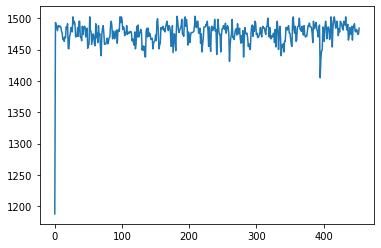

In [117]:
plt.plot(resultados2)